In [1]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

In [2]:
# reading train data into train and changing the index column to Id
train = pd.read_csv('House_Price_Extracted/train.csv',index_col='Id')

In [3]:
#checking train head
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# reading the test data into test
test=pd.read_csv('House_Price_Extracted/test.csv',index_col='Id')

In [5]:
#checking head
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#checking Train features
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
#checking train shape for (rows,columns)
train.shape

(1460, 80)

In [8]:
#checking the data info of features,null count, Data Types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# Finding the number of features with null value
train.isnull().sum()[train.isnull().sum()!=0].count()

19

In [10]:
# Finding the null value in each features
train.isnull().sum()[train.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# Finding the null value with percentage, perc = (total null value / 1460(row length))*100
((train.isnull().sum()[train.isnull().sum()!=0])/14.60).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
#droping features with more than 47% null values
cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
train = train.drop(cols, axis=1)

In [13]:
#cross checking the features after drop
((train.isnull().sum()[train.isnull().sum()!=0])/14.60).sort_values(ascending=False)

LotFrontage     17.739726
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [14]:
cols=train.isnull().sum()[train.isnull().sum()!=0]

In [15]:
cols=cols.index

In [16]:
# Refering features data type, To replace the null value with
# mode() - Object
# mean() - float
train[cols].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [17]:
# Assigning the float feature to col_float
# Assigning the object feature to col_object
cols_float=train[cols].select_dtypes(include=["float","int","bool"]).columns.values
cols_object=train[cols].select_dtypes(include=["object"]).columns.values

In [18]:
train[cols_float].mean()

LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [19]:
# Finding the mode of object features
train[cols_object].mode()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,None,TA,TA,No,Unf,Unf,SBrkr,Attchd,Unf,TA,TA


In [20]:
train['LotFrontage']=train['LotFrontage'].replace(np.nan, 70.0) #float32
train['GarageCond']=train['GarageCond'].replace(np.nan, 'No') #object
train['GarageQual']=train['GarageQual'].replace(np.nan, 'No') #object
train['GarageFinish']=train['GarageFinish'].replace(np.nan, 'No') #object
train['GarageYrBlt']=train['GarageYrBlt'].replace(np.nan, 1978.0) #float64
train['GarageType']=train['GarageType'].replace(np.nan, 'No') #object
train['BsmtFinType2']=train['BsmtFinType2'].replace(np.nan, 'No') #object
train['BsmtExposure']=train['BsmtExposure'].replace(np.nan, 'Nobase') #object
train['BsmtFinType1']=train['BsmtFinType1'].replace(np.nan, 'No') #object
train['BsmtCond']=train['BsmtCond'].replace(np.nan, 'No') #object
train['BsmtQual']=train['BsmtQual'].replace(np.nan, 'No') #object
train['MasVnrArea']=train['MasVnrArea'].replace(np.nan, 103.0) #float64
train['MasVnrType']=train['MasVnrType'].replace(np.nan, 'None') #object
train['Electrical']=train['Electrical'].replace(np.nan, 'SBrkr') #object

In [21]:
# checking the null values again
train.isnull().sum()[train.isnull().sum()!=0].count()

0

# Visualization

most of the features are correlated with each other like Garage Cars and Garage Area, isnt it?

OverallQual is highly correlated with target feature SalePrice 0.79 can you see. we'll see how it effected the saleprice in below graph.

In [22]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

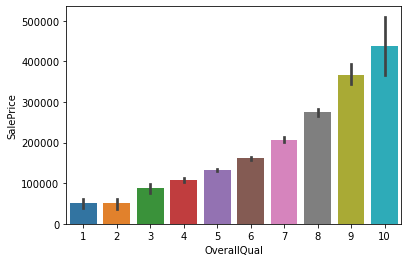

In [23]:
sns.barplot(train.OverallQual,train.SalePrice)

In [24]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [25]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

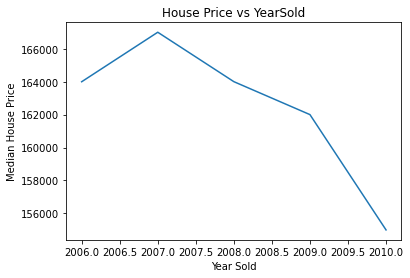

In [27]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

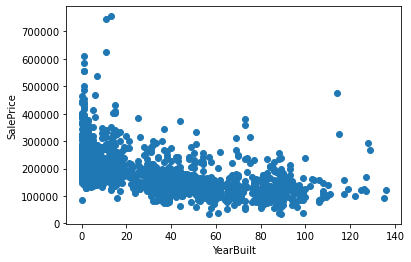

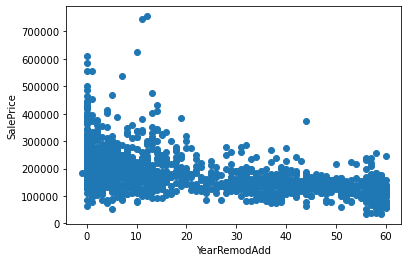

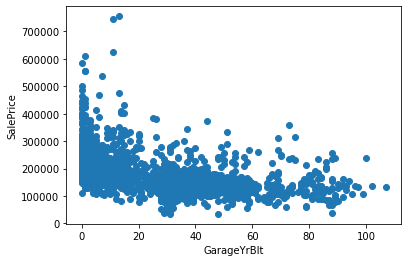

In [28]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [29]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


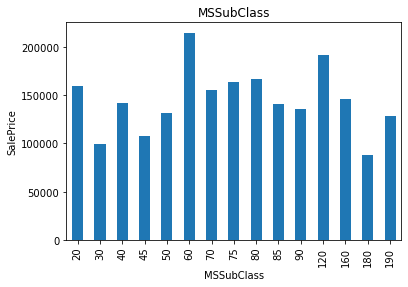

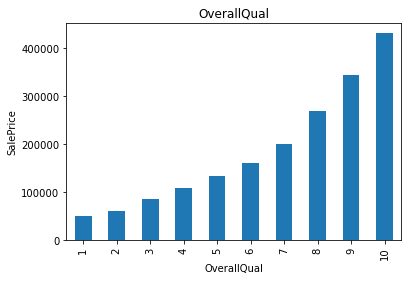

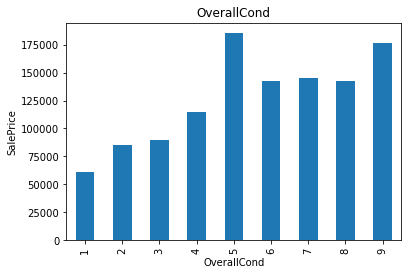

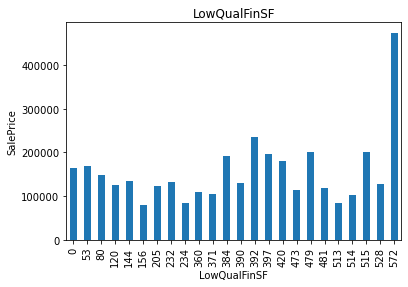

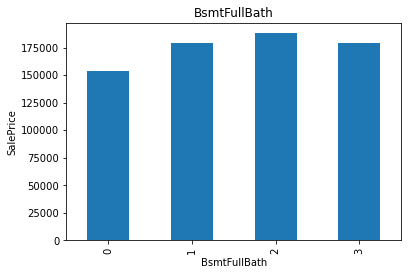

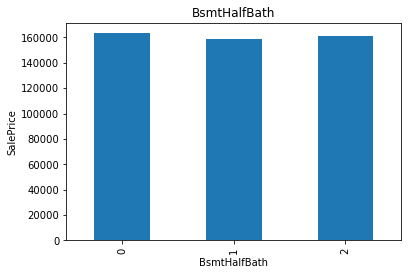

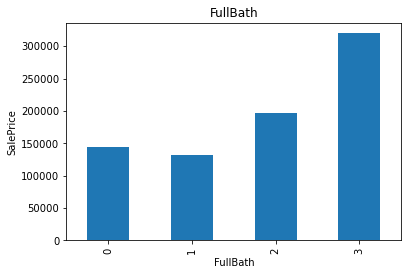

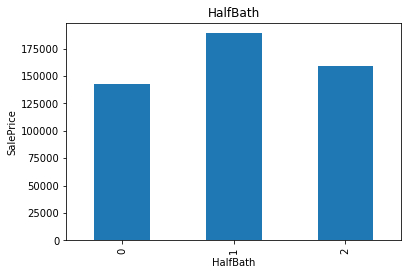

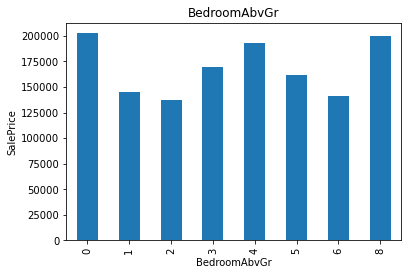

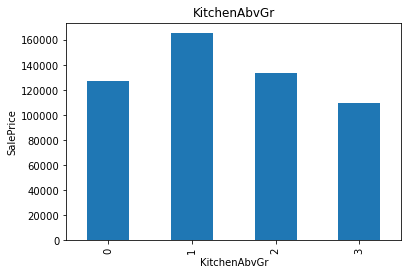

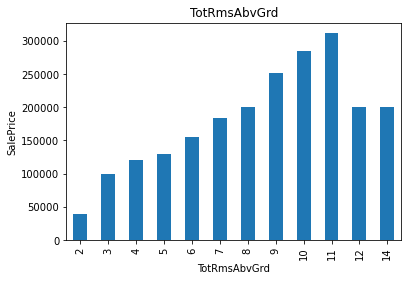

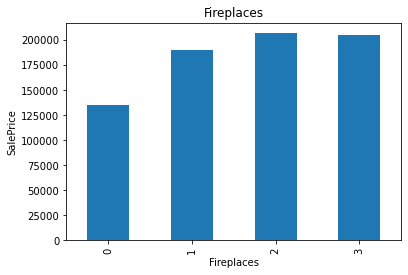

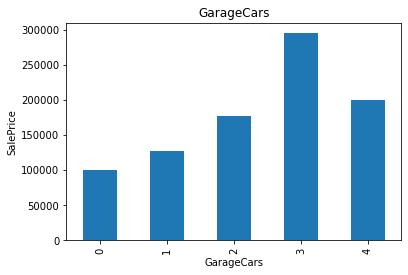

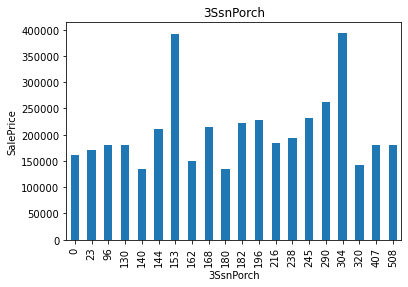

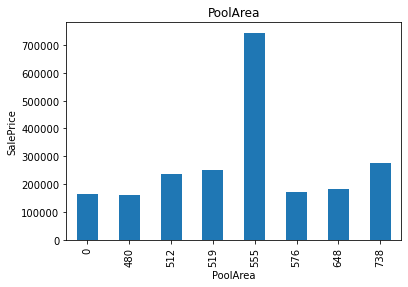

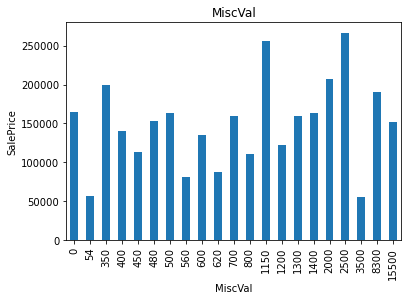

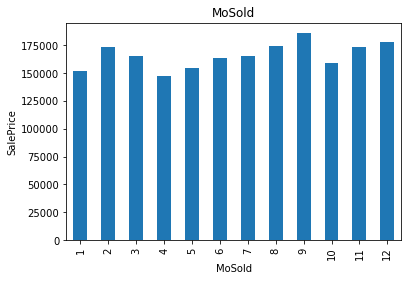

In [30]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [31]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


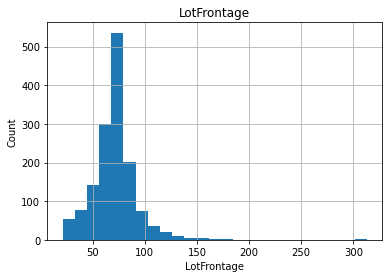

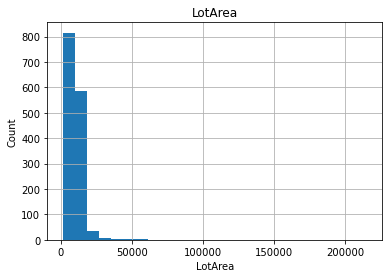

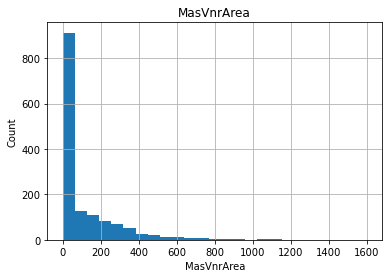

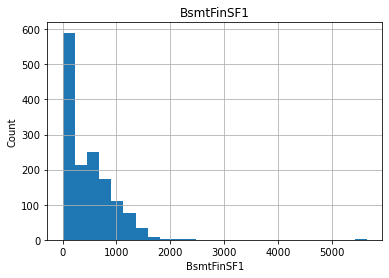

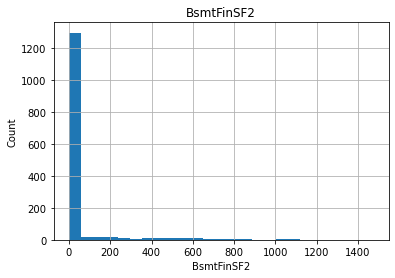

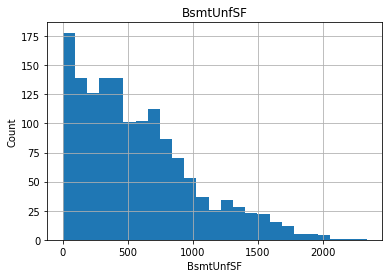

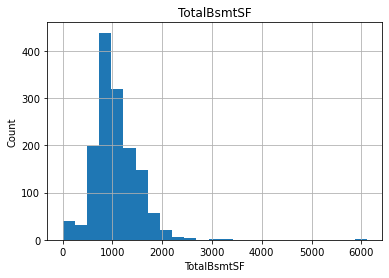

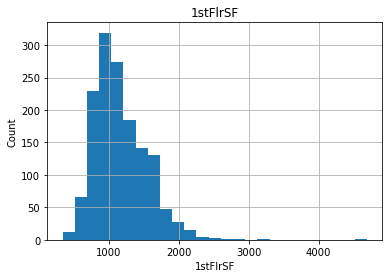

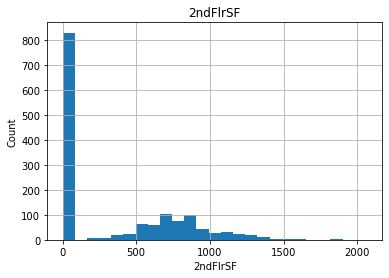

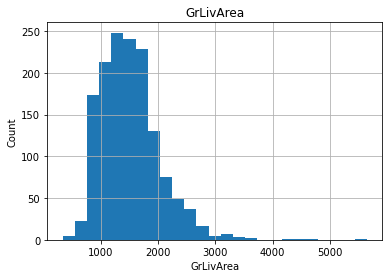

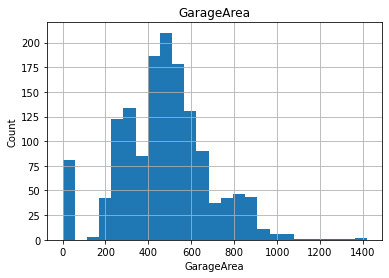

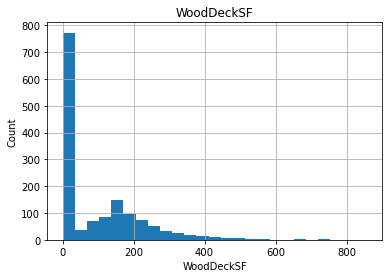

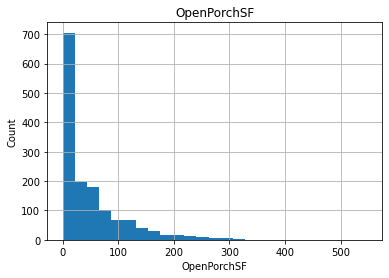

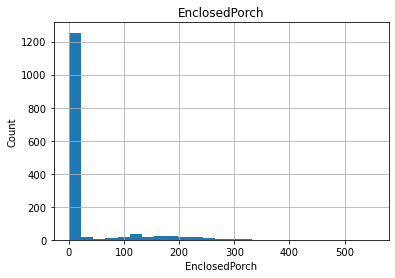

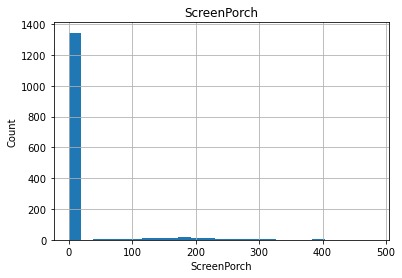

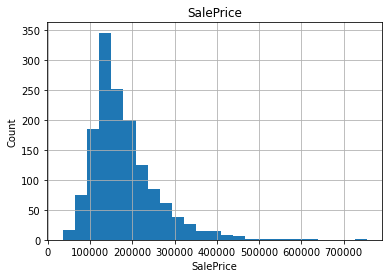

In [32]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

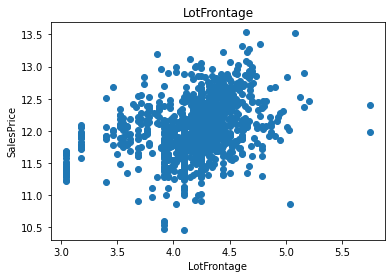

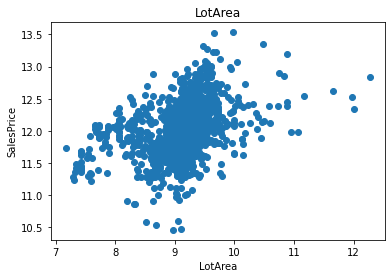

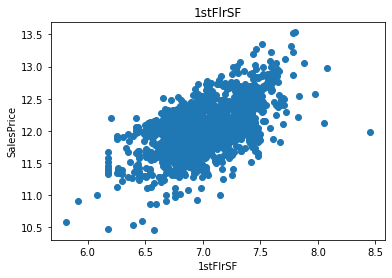

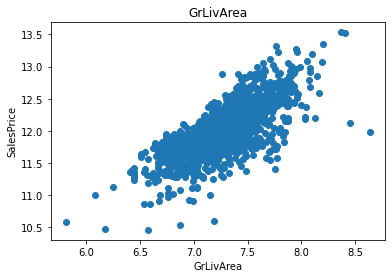

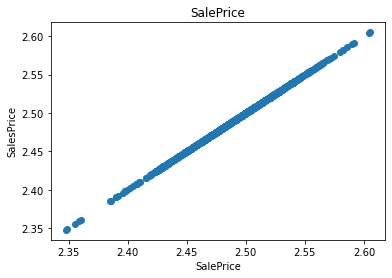

In [33]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [34]:
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']


In [35]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of categories are 4
The feature is ExterQual and number of 

#Find out the relationship between categorical variable and dependent feature SalesPrice

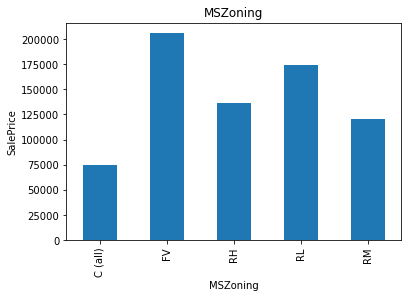

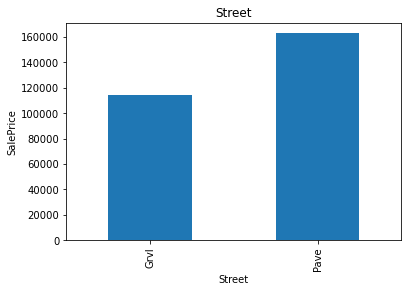

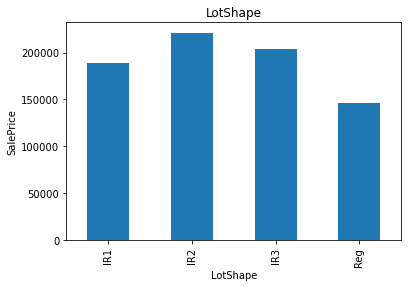

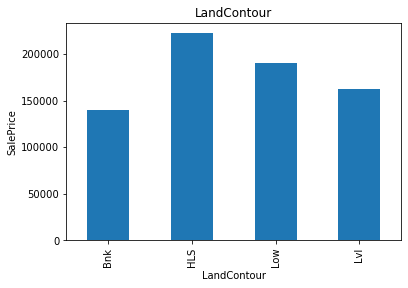

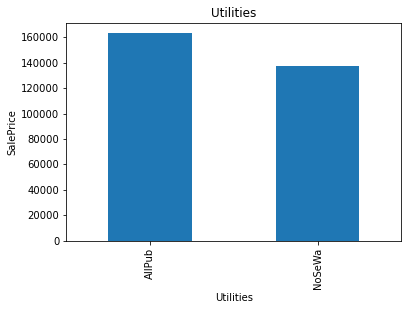

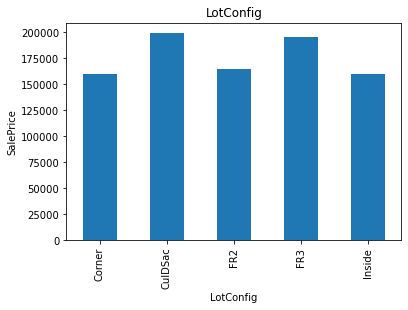

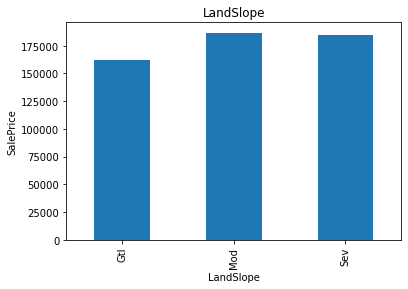

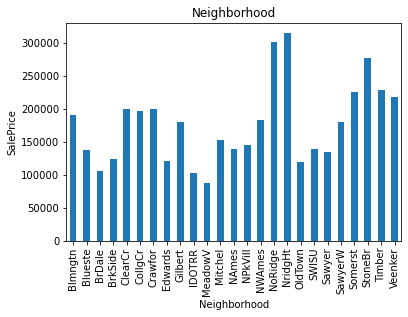

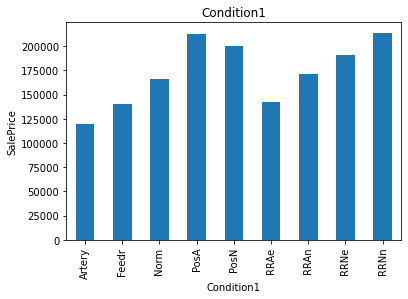

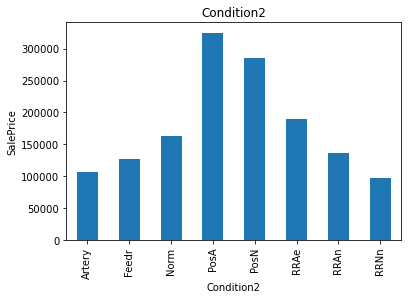

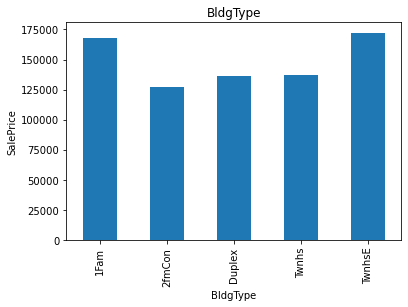

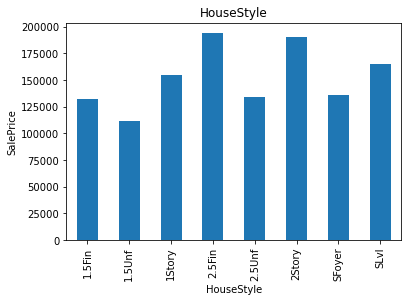

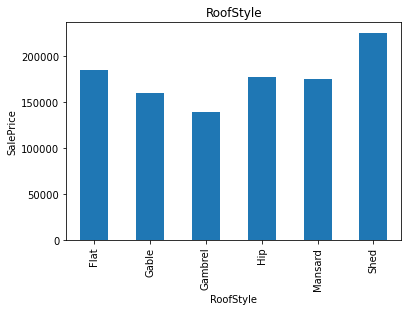

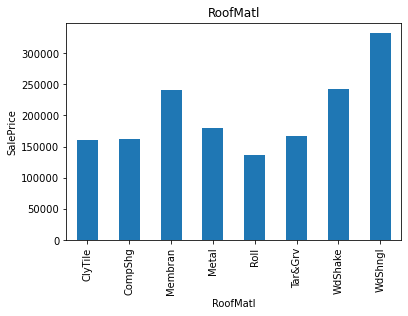

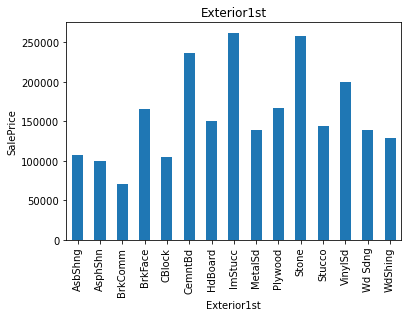

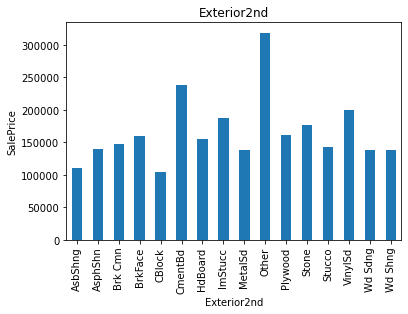

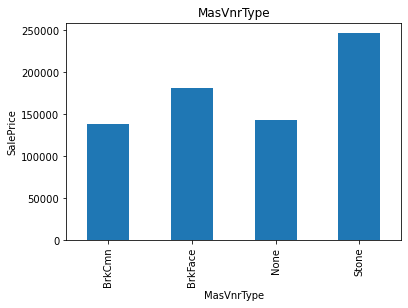

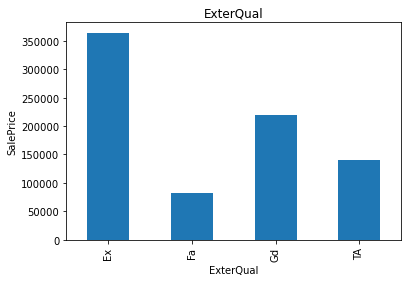

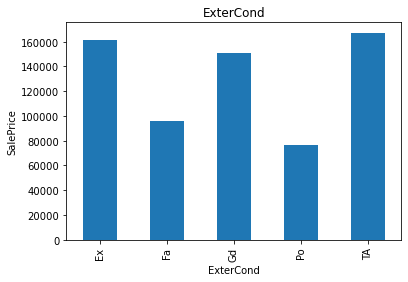

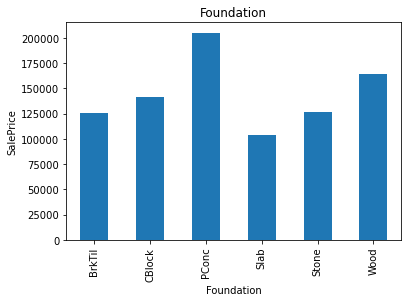

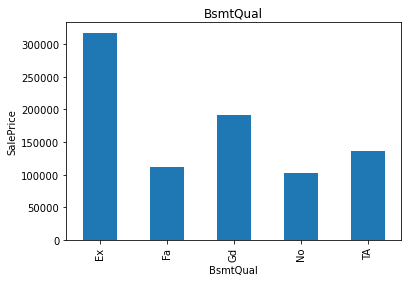

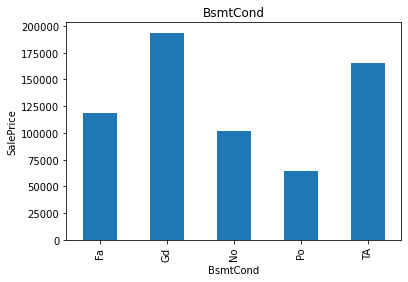

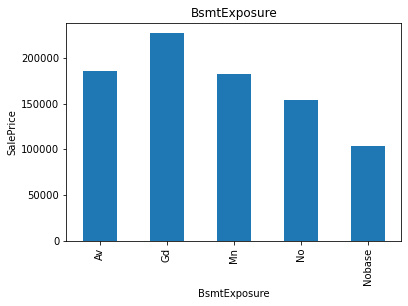

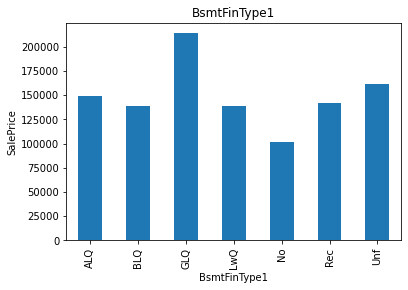

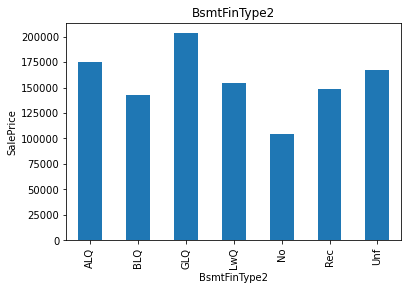

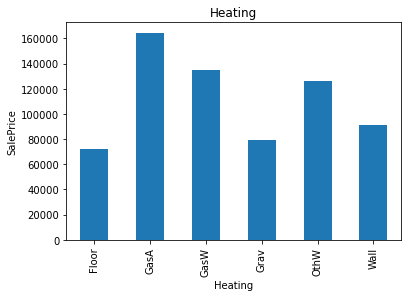

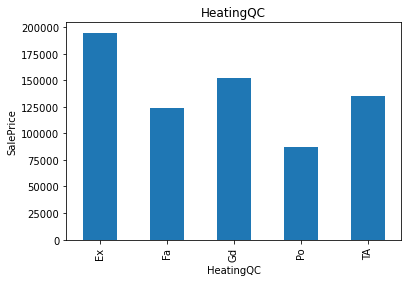

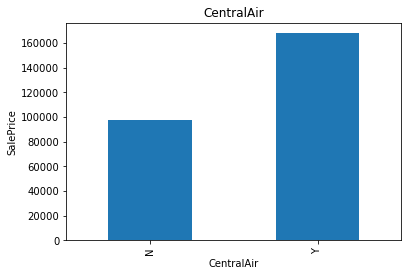

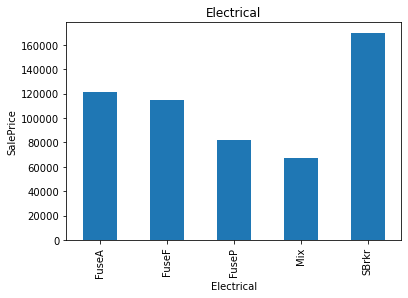

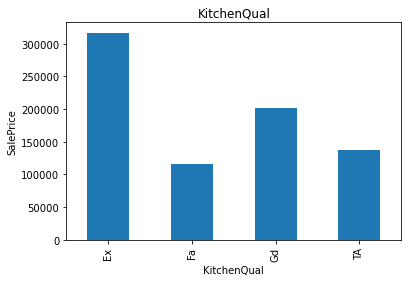

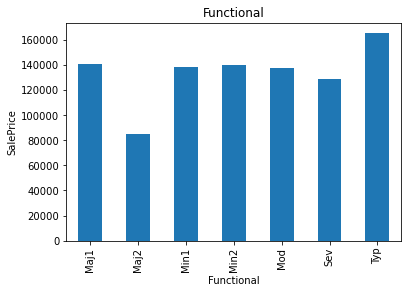

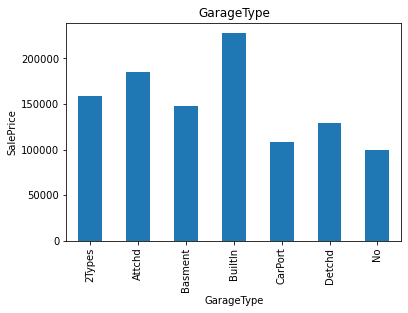

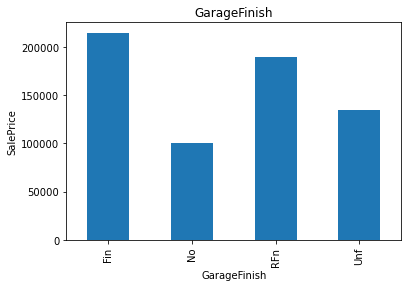

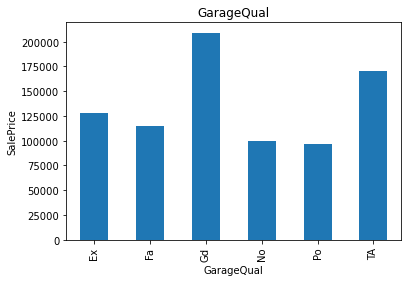

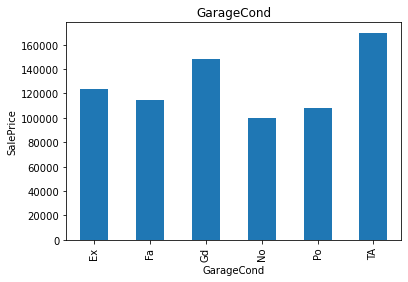

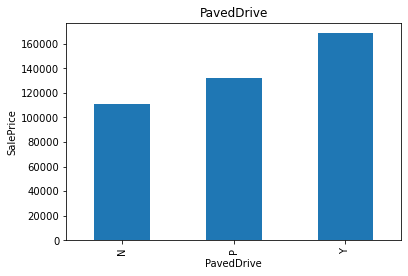

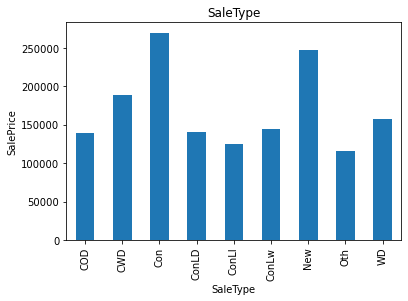

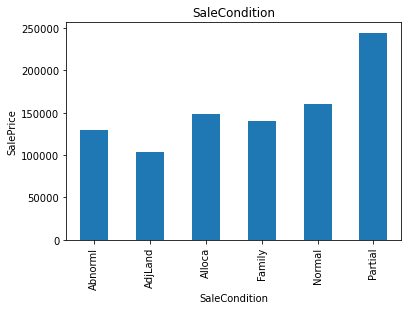

In [36]:
for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

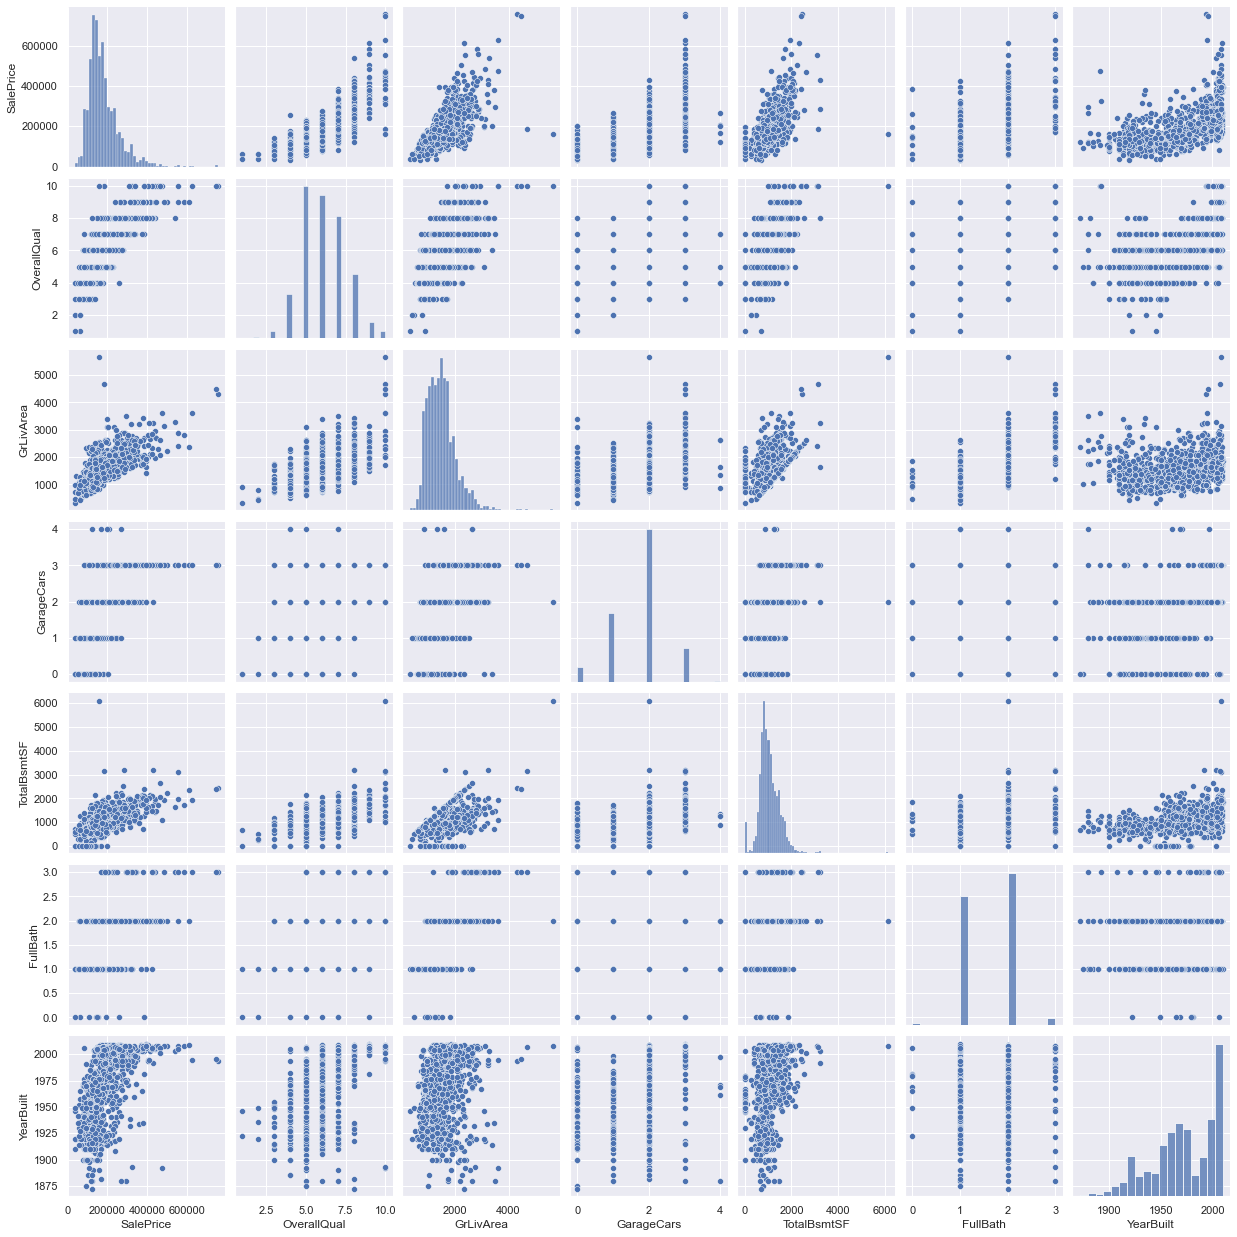

In [37]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [38]:
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis,norm, skew


 mu = 180921.20 and sigma = 79415.29



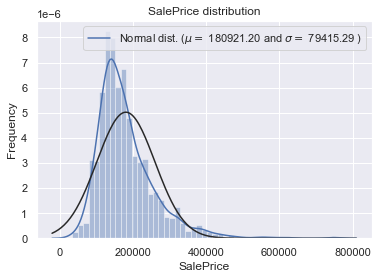

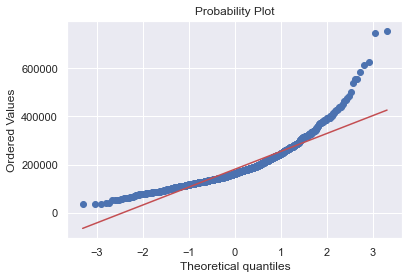

In [39]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


## Checking Correlation

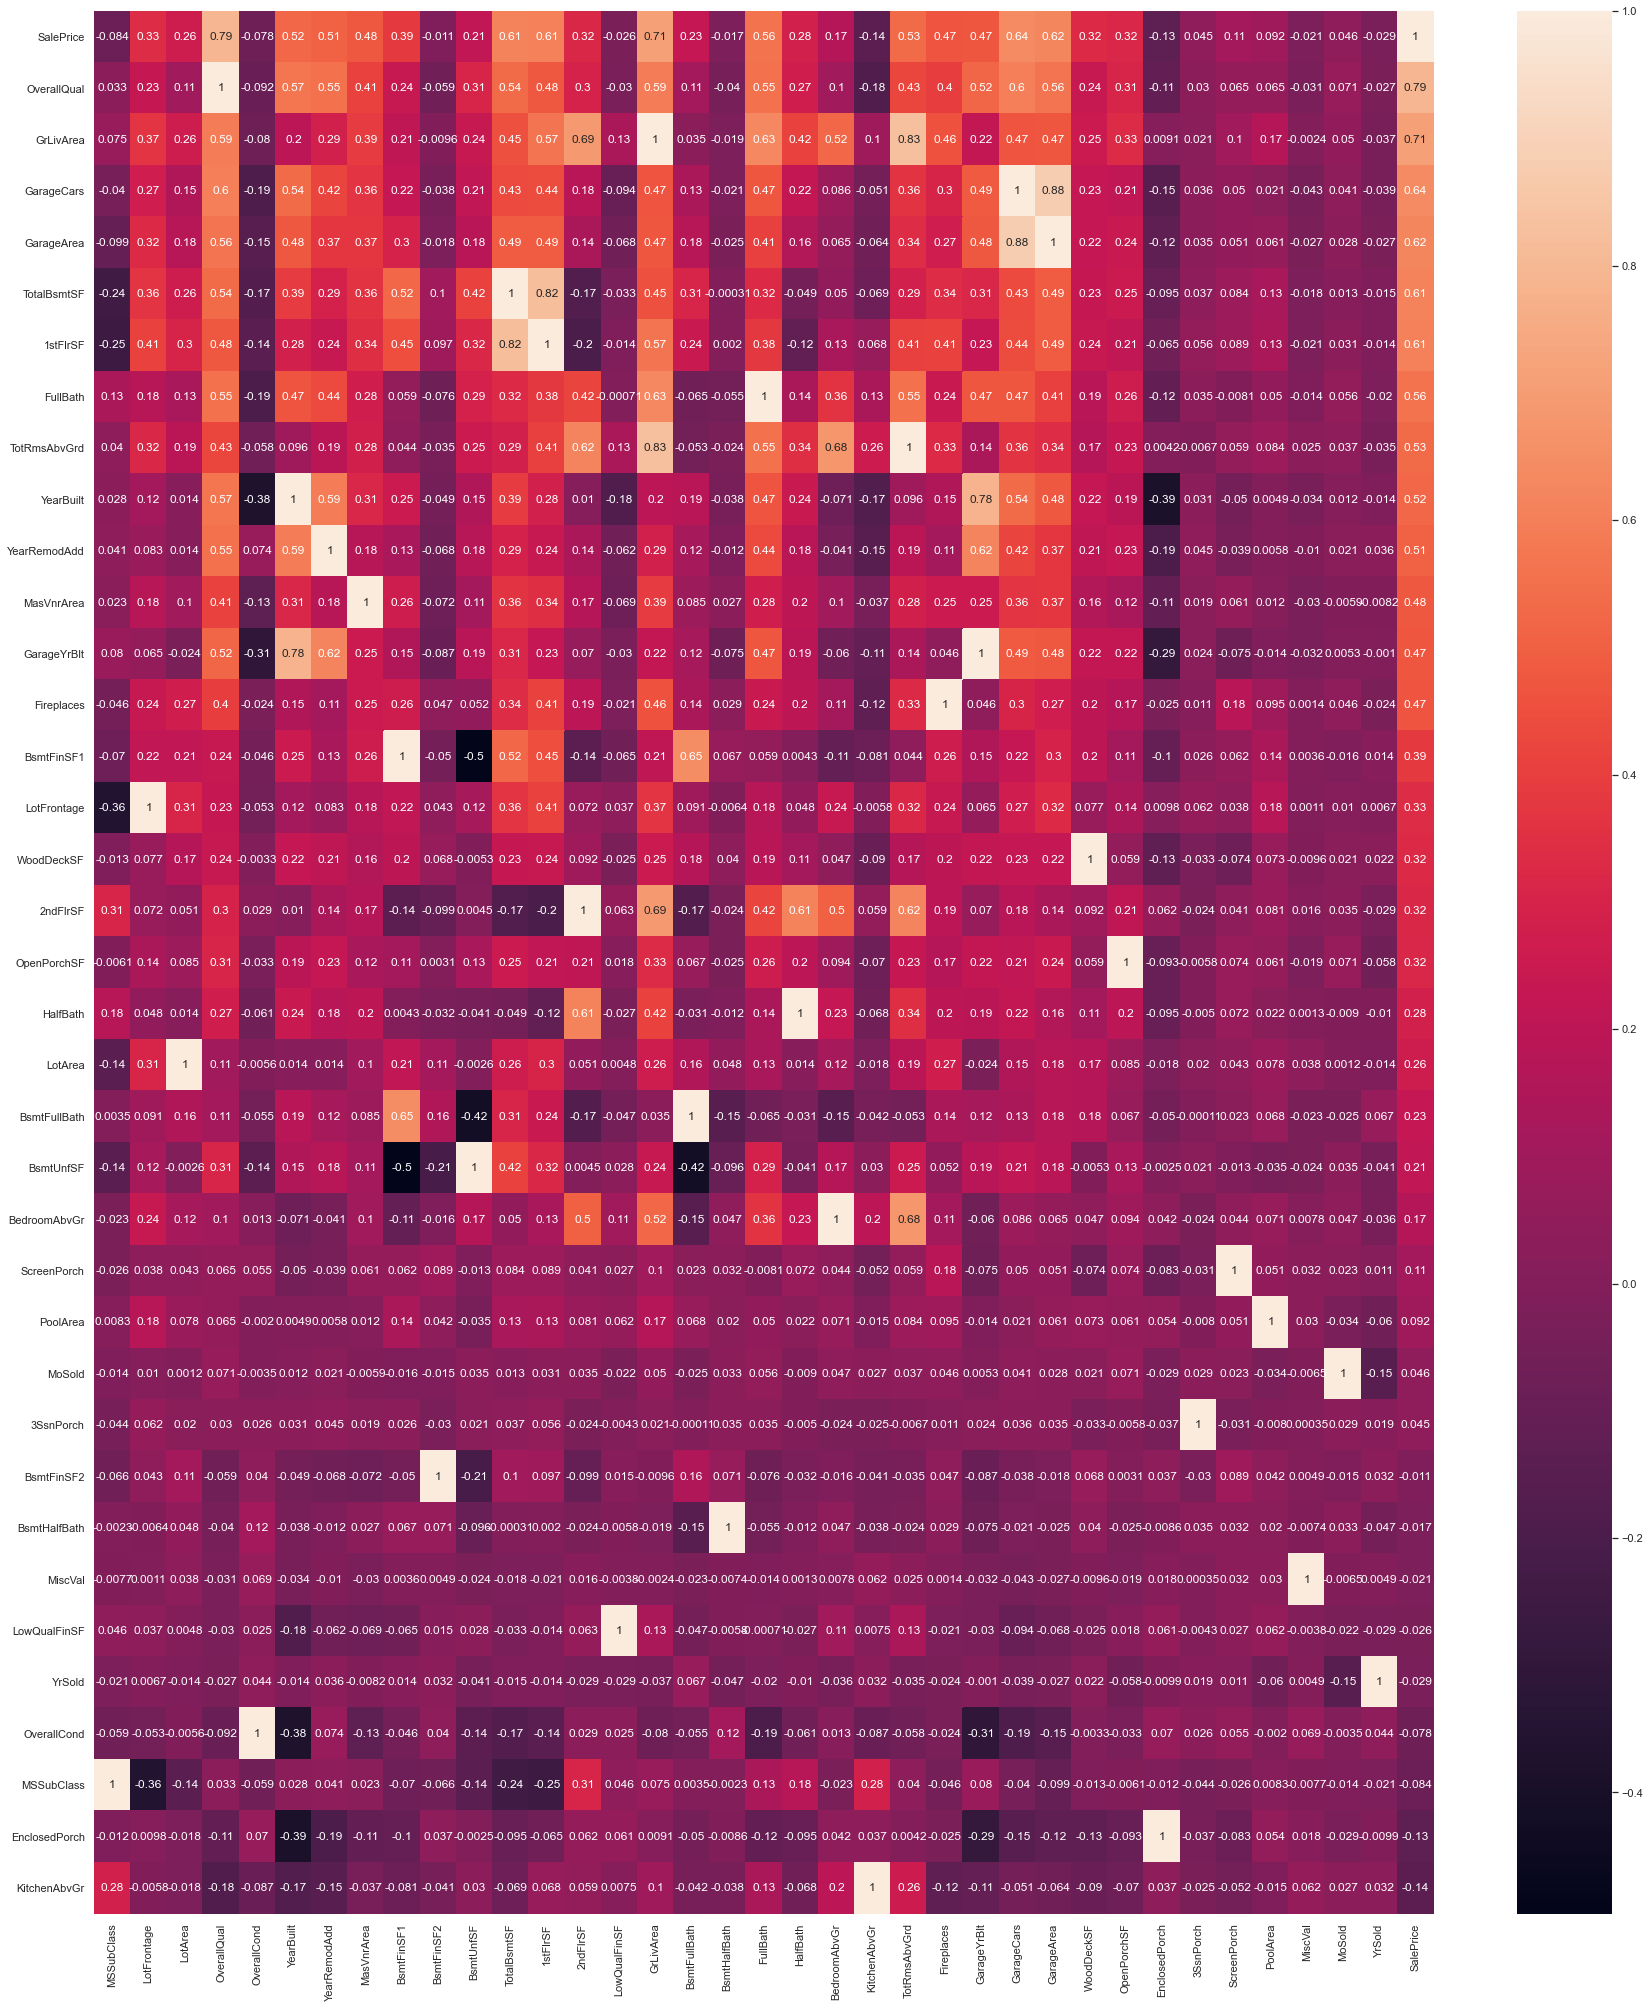

In [40]:
#checking for correlation with heatmap
trc=train.corr().sort_values(by='SalePrice',axis=0,ascending=False)
plt.figure(figsize=(30,35))
sns.heatmap(trc,annot=True)
plt.show()


In [41]:
#Negative Features Removed
train=train.drop(['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass',
                   'EnclosedPorch','KitchenAbvGr'],axis=1)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

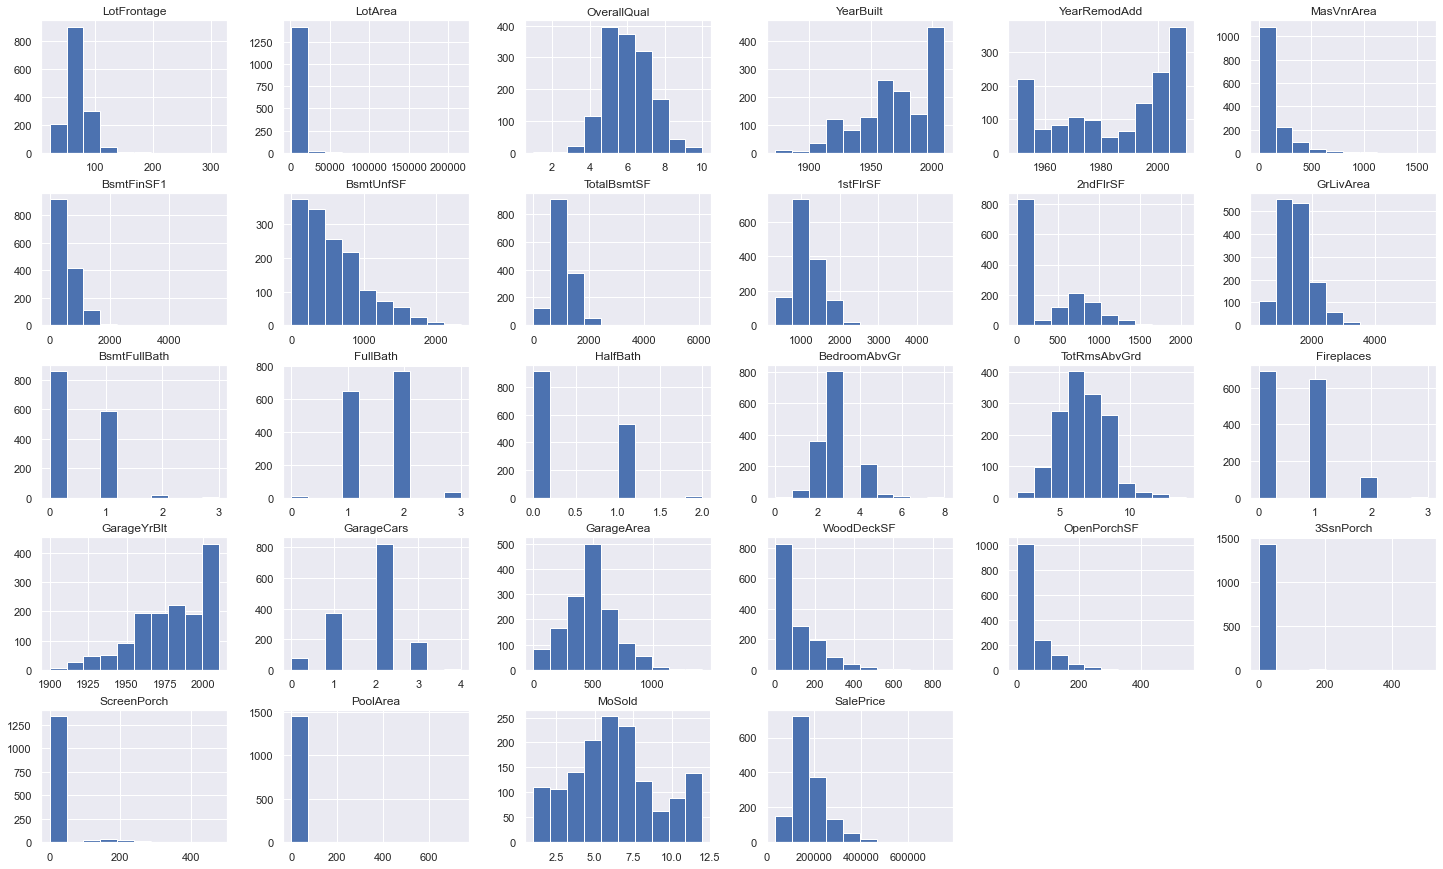

In [43]:
#checking train2 data histogram to for data skewness and kurtosis
train.hist(figsize=(25,50), grid=True, layout=(16, 6), bins = 10)
plt.show()

In [44]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  28


In [45]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [46]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [47]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']

<AxesSubplot:>

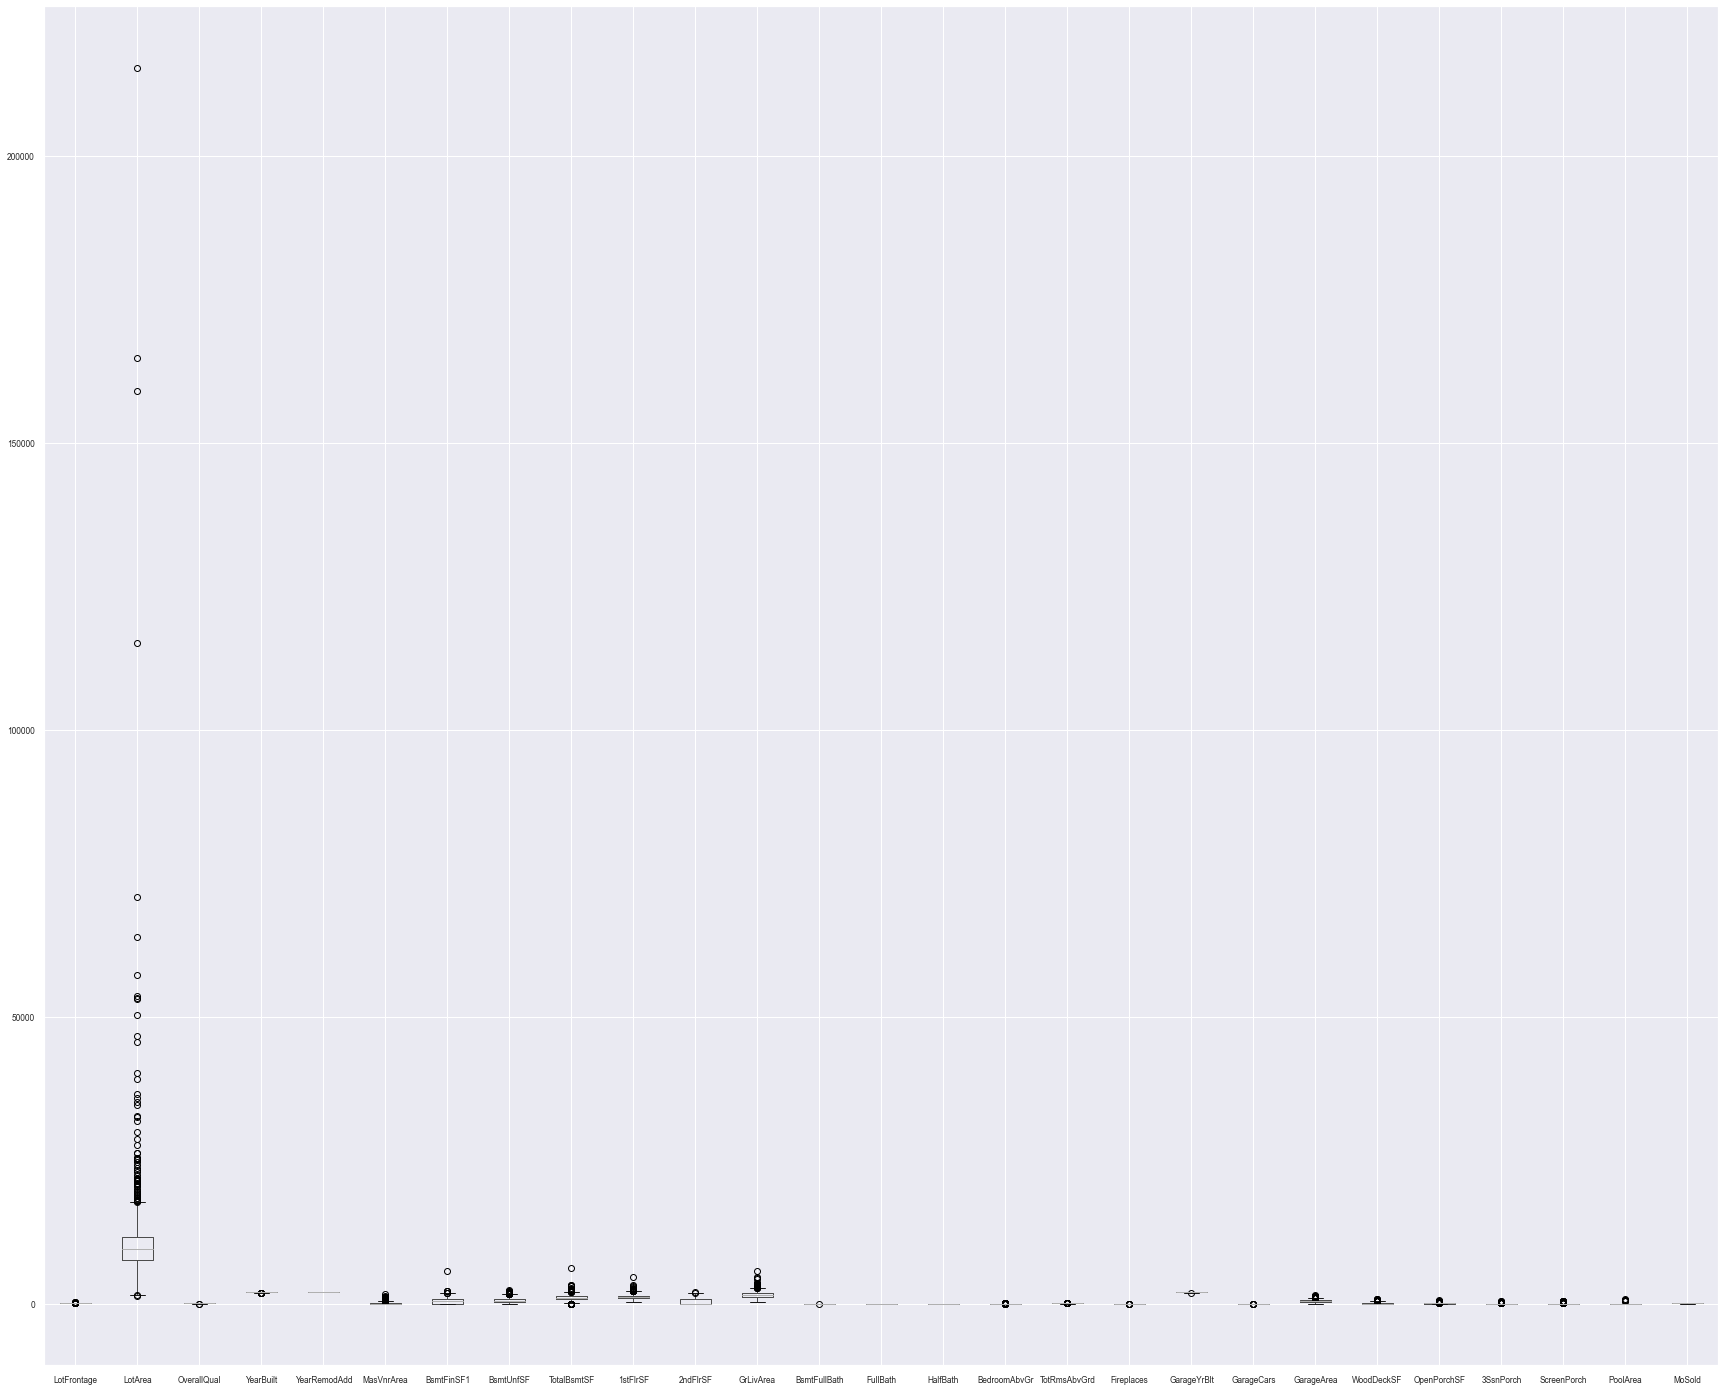

In [48]:
sns.set(font_scale=.75) 
train.iloc[:,:-1].boxplot(rot = 0, figsize=(30,25))

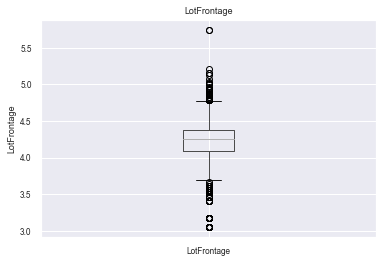

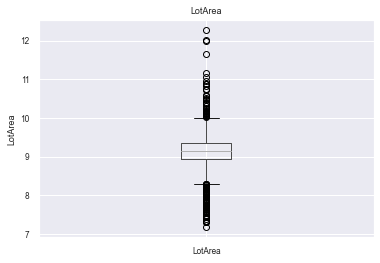

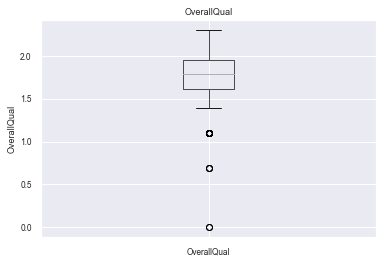

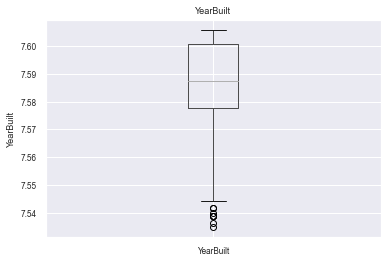

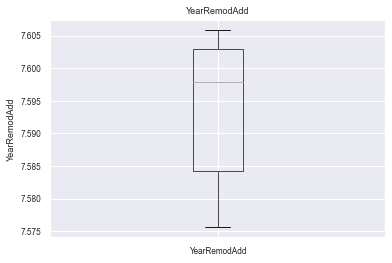

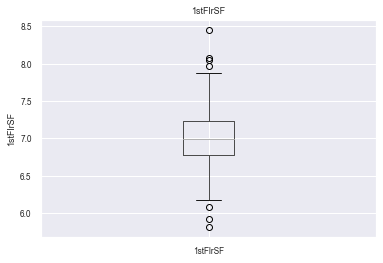

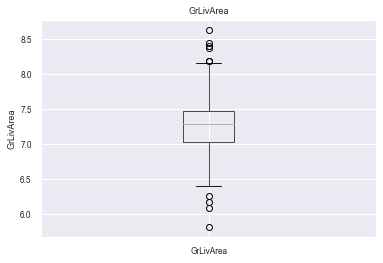

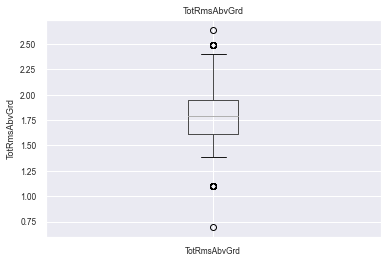

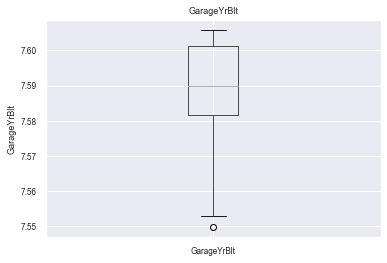

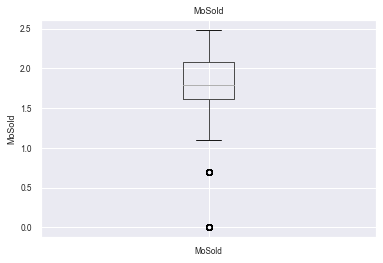

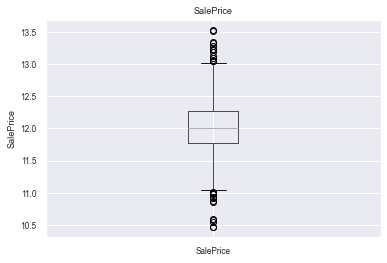

In [49]:

for feature in numerical_features :
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Checking the Skewness with 'numerical features'

In [50]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [51]:
skew_values = skew(train[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
25,PoolArea,14.813135
1,LotArea,12.195142
23,3SsnPorch,10.293752
24,ScreenPorch,4.117977
5,MasVnrArea,2.673723
0,LotFrontage,2.383704
22,OpenPorchSF,2.361912
27,SalePrice,1.880941
6,BsmtFinSF1,1.683771
21,WoodDeckSF,1.539792


## Checking the Kurtosis with 'numerical features'

In [52]:
kurtosis_value =kurtosis(train[numerical_features])
dummy_k = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']),
                   pd.DataFrame(list(kurtosis_value), columns=['Kurtosis Degree'])], axis=1)
dummy_k.sort_values(by ='Kurtosis Degree', ascending=False)

,Features,Kurtosis Degree
25,PoolArea,222.500507
1,LotArea,202.543793
23,3SsnPorch,123.235177
0,LotFrontage,21.773108
24,ScreenPorch,18.371874
8,TotalBsmtSF,13.201042
6,BsmtFinSF1,11.076090
5,MasVnrArea,10.115688
22,OpenPorchSF,8.457180
27,SalePrice,6.509812


## Applying Log Transformation

In [53]:
# Applying log transformation
train['PoolArea'] = np.log2(train['PoolArea']+1)
train['LotArea'] = np.log2(train['LotArea']+1)
train['3SsnPorch'] = np.log(train['3SsnPorch']+1)
train['ScreenPorch'] = np.log(train['ScreenPorch']+1)
#train['MasVnrType'] = np.log(train['MasVnrType']+1)
train['MasVnrArea'] = np.log(train['MasVnrArea']+1)
train['LotFrontage'] = np.log(train['LotFrontage']+1)
train['OpenPorchSF'] = np.log(train['OpenPorchSF']+1)
train['SalePrice'] = np.log(train['SalePrice']+1)
train['BsmtFinSF1'] = np.log(train['BsmtFinSF1']+1)
train['WoodDeckSF'] = np.log(train['WoodDeckSF']+1)
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF']+1)
train['1stFlrSF'] = np.log(train['1stFlrSF']+1)
train['GrLivArea'] = np.log(train['GrLivArea']+1)


# Checking the Skewness after Log Transformation

In [54]:
skew_values = skew(train[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
25,PoolArea,14.348342
23,3SsnPorch,7.727026
24,ScreenPorch,3.147171
7,BsmtUnfSF,0.919323
10,2ndFlrSF,0.812194
16,TotRmsAbvGrd,0.675646
14,HalfBath,0.675203
17,Fireplaces,0.648898
12,BsmtFullBath,0.595454
5,MasVnrArea,0.480648


In [55]:
#removing features above 1 skewness
train=train.drop(['PoolArea','3SsnPorch','ScreenPorch'],axis=1)

In [56]:
#removing feature in negatibe skwness above -1
train=train.drop(['TotalBsmtSF'],axis=1)

In [57]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  24


###### Checking the skewness data after removing positive and negative skewness

In [58]:
skew_values = skew(train[numerical_features], nan_policy = 'omit')

dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
7,BsmtUnfSF,0.919323
9,2ndFlrSF,0.812194
15,TotRmsAbvGrd,0.675646
13,HalfBath,0.675203
16,Fireplaces,0.648898
11,BsmtFullBath,0.595454
5,MasVnrArea,0.480648
2,OverallQual,0.216721
22,MoSold,0.211835
14,BedroomAbvGr,0.211572


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [60]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in categorical_features:
    train[i] = enc.fit_transform(train[i])

In [61]:
X=train.iloc[:,:-1]

In [62]:
X.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,4.189655,13.044906,1,3,3,0,4,0,5,2,2,0,5,7,2003,2003,1,1,12,13,1,5.283204,2,4,2,2,4,3,2,6.561031,6,150,1,0,1,4,6.753438,854,7.444833,1,2,1,3,2,8,6,0,1,2003.0,2,2,548,5,5,2,0.000000,4.127134,2,8,4
2,3,4.394449,13.228969,1,3,3,0,2,0,24,1,2,0,2,6,1976,1976,1,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,284,1,0,1,4,7.141245,0,7.141245,0,2,0,3,3,6,6,1,1,1976.0,2,2,460,5,5,2,5.700444,0.000000,5,8,4
3,3,4.234107,13.457766,1,0,3,0,4,0,5,2,2,0,5,7,2001,2002,1,1,12,13,1,5.093750,2,4,2,2,4,2,2,6.188264,6,434,1,0,1,4,6.825460,866,7.488294,1,2,1,3,2,6,6,1,1,2001.0,2,2,608,5,5,2,0.000000,3.761200,9,8,4
4,3,4.110874,13.221436,1,0,3,0,0,0,6,2,2,0,5,7,1915,1970,1,1,13,15,2,0.000000,3,4,0,4,1,3,0,5.379897,6,540,1,2,1,4,6.869014,756,7.448916,1,1,0,3,2,7,6,1,5,1998.0,3,3,642,5,5,2,0.000000,3.583519,2,8,0
5,3,4.442651,13.799788,1,0,3,0,2,0,15,2,2,0,5,8,2000,2000,1,1,12,13,1,5.860786,2,4,2,2,4,0,2,6.486161,6,490,1,0,1,4,7.044033,1053,7.695758,1,2,1,4,2,9,6,1,1,2000.0,2,3,836,5,5,2,5.262690,4.442651,12,8,4


In [63]:
y=train['SalePrice']

In [64]:
y.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

# Train_Test_Split

In [65]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=36)

In [66]:
X_train.shape

(1168, 61)

# LinearRegression before scale

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None
)

In [68]:
lr.fit(X_train,y_train)

LinearRegression()

In [69]:
ypredictlr=lr.predict(X_test)

In [70]:
from sklearn.metrics import r2_score
lr_acc=round(r2_score(y_test, ypredictlr),2)

In [71]:
lr_acc

0.88

In [72]:
def get_rmse(y_test, pred):
    rmse = np.sqrt(mean_squared_error(y_test, pred, sample_weight=None, multioutput='uniform_average'))
    return rmse

In [73]:
from sklearn.metrics import mean_squared_error
lr_rmse=get_rmse(y_test,ypredictlr)
lr_rmse

0.15285653721851655

In [74]:
ypred_train=lr.predict(X_train)

In [75]:
lr_mse=mean_squared_error(y_train,ypred_train)
lr_mse

0.016563123347652482

In [76]:
from sklearn.metrics import mean_absolute_error
lr_mae=mean_absolute_error(y_test,ypredictlr)
lr_mae

0.10655442877871305

In [77]:
X_test.shape

(292, 61)

In [78]:
lr_test_pre = lr.predict(X_test)
lr_train_pre = lr.predict(X_train)

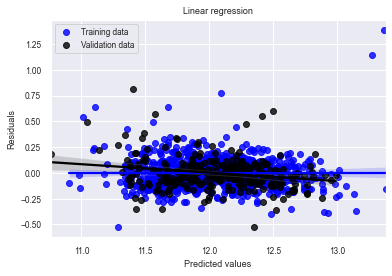

In [79]:
sns.regplot(lr_train_pre, lr_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lr_test_pre,lr_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SGDRegressor before scaled - bs

In [80]:
from sklearn.linear_model import SGDRegressor

In [81]:
sgdc_bs=SGDRegressor(
    loss='squared_loss',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [82]:
sgdc_bs.fit(X_train,y_train)

SGDRegressor(alpha=0.25, eta0=0.5, learning_rate='adaptive', max_iter=200)

In [83]:
ypredictsgdc_bs=sgdc_bs.predict(X_test)

In [84]:
from sklearn.metrics import r2_score
sgdc_bs_acc=r2_score(y_test, ypredictsgdc_bs)

In [85]:
sgdc_bs_acc

-3.7635373698804853e+25

# Standard Scaler

In [86]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [88]:
X = pca.fit(X_train)

In [89]:
explained_variance = pca.explained_variance_ratio_

In [90]:
print(X.components_)

[[ 1.00000000e+00 -1.31930371e-16 -2.00205621e-16 ...  1.54004324e-18
  -6.16017295e-18  4.17095043e-18]
 [ 1.31930371e-16  1.00000000e+00 -7.88258347e-15 ...  1.26141450e-17
  -9.27093006e-17  2.14480581e-17]
 [ 2.00205621e-16  7.32747196e-15  1.00000000e+00 ...  1.68683200e-18
   8.05803149e-18 -2.67907912e-17]
 ...
 [-1.54004324e-18 -2.86229374e-17  2.34187669e-17 ...  1.00000000e+00
   5.06539255e-15 -8.50014503e-17]
 [ 6.16017295e-18  5.55111512e-17  7.63278329e-17 ... -4.87110352e-15
   1.00000000e+00  3.13334428e-16]
 [-4.17095043e-18 -7.28583860e-17  3.46944695e-17 ...  1.08101733e-16
  -4.57582868e-16  1.00000000e+00]]


In [91]:
explained_variance.shape

(61,)

# ElasticNet

In [92]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [93]:
#X_train, y_train = make_regression(n_features=1,random_state=0)
en = ElasticNet(
    alpha=0.001,
    l1_ratio=0.10,
    max_iter=1000,
    random_state=0)

In [94]:
en.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=0)

In [95]:
ypredicten=en.predict(X_test)

In [96]:
from sklearn.metrics import r2_score
en_acc=round(r2_score(y_test, ypredicten),2)

In [97]:
en_acc

0.88

In [98]:
from sklearn.metrics import mean_squared_error
en_mse=mean_squared_error(y_test,ypredicten) 
en_mse

0.023342528263827107

In [99]:
from sklearn.metrics import mean_absolute_error
en_mae=mean_absolute_error(y_test,ypredicten) 
en_mae

0.10650370239123587

In [100]:
en.score(X_test,y_test)

0.8829957633333119

In [101]:
from sklearn.metrics import mean_squared_error
en_rmse=get_rmse(y_test,ypredicten)
en_rmse

0.1527826176756607

In [102]:
from sklearn.metrics import mean_absolute_error
en_mae=mean_absolute_error(y_test,ypredicten) 
en_mae

0.10650370239123587

In [103]:
en_test_pre = en.predict(X_test)
en_train_pre = en.predict(X_train)

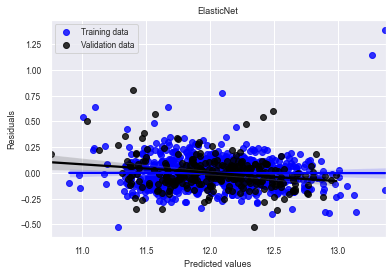

In [104]:
#plot between predicted values and residuals
sns.regplot(en_train_pre, en_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(en_test_pre,en_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
lr_scaled=LinearRegression()

In [106]:
lr_scaled.fit(X_train,y_train)

LinearRegression()

In [107]:
ypredictlr_scaled=lr_scaled.predict(X_test)

In [108]:
from sklearn.metrics import r2_score
lr_scaled_acc=round(r2_score(y_test, ypredictlr_scaled),2)

In [109]:
lr_scaled_acc

0.88

In [110]:
mean_squared_error(y_test,ypredictlr_scaled) 

0.02336512097043564

In [111]:
lr_scaled.score(X_test,y_test)

0.8828825175717092

In [112]:
lr_scaled.score(X_train,y_train)

0.8890813956181491

In [113]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,ypredictlr_scaled)

0.0001427530913887053

In [114]:
get_rmse(y_test,ypredictlr_scaled)

0.15285653721851625

In [115]:
#getting root mean square error
lr_scaled_rmse=get_rmse(y_test,ypredictlr_scaled)
lr_scaled_rmse

0.15285653721851625

In [116]:
from sklearn.metrics import mean_squared_error
lr_scaled_mse=mean_squared_error(y_test,ypredictlr_scaled) 
lr_scaled_mse

0.02336512097043564

In [117]:
from sklearn.metrics import mean_absolute_error
lr_scaled_mae=mean_absolute_error(y_test,ypredicten) 
lr_scaled_mae

0.10650370239123587

In [118]:
lr_scaled_test_pre = lr_scaled.predict(X_test)
lr_scaled_train_pre = lr_scaled.predict(X_train)

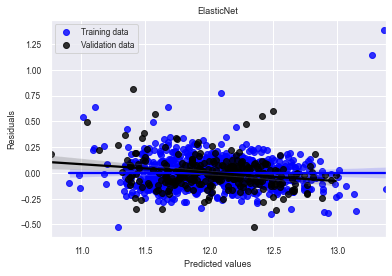

In [119]:
#plot between predicted values and residuals
sns.regplot(lr_scaled_train_pre, lr_scaled_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lr_scaled_test_pre,lr_scaled_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SVR

In [120]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [121]:
ypredictsvr = svr.predict(X_test)

In [122]:
from sklearn.metrics import r2_score
svr_acc=round(r2_score(y_test, ypredictsvr),2)

In [123]:
svr_acc

0.83

In [124]:
mean_squared_error(y_test,ypredictsvr) 

0.03361466799611959

In [125]:
svr.score(X_train,y_train)

0.9600596768258404

In [126]:
svr.score(X_test,y_test)

0.8315067448891124

In [127]:
#getting root mean square error
svr_rmse=get_rmse(y_test,ypredictsvr)
svr_rmse

0.183343033672184

In [128]:
svr_mae=mean_absolute_error(y_test,ypredictsvr) 
svr_mae

0.11516678234962259

In [129]:
svr_mse=mean_squared_error(y_test,ypredictsvr)
svr_mse

0.03361466799611959

In [130]:
svr_test_pre = svr.predict(X_test)
svr_train_pre = svr.predict(X_train)

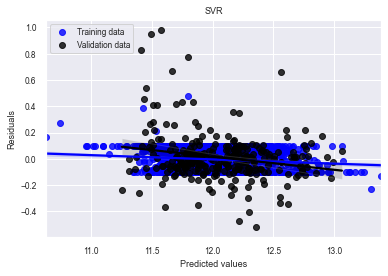

In [131]:
#plot between predicted values and residuals
sns.regplot(svr_train_pre, svr_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(svr_test_pre,svr_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("SVR")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# MLPRegressor

In [132]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    activation='identity',
    batch_size=400,
    max_iter=500,
    max_fun=5000,
    learning_rate_init=0.10
    
)

In [133]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='identity', batch_size=400, learning_rate_init=0.1,
             max_fun=5000, max_iter=500)

In [134]:
ypredictmlp = mlp.predict(X_test)

In [135]:
from sklearn.metrics import r2_score
mlp_acc=round(r2_score(y_test, ypredictmlp),2)

In [136]:
mlp_acc

0.85

In [137]:
mean_squared_error(y_test,ypredictmlp) 

0.028987537548676143

In [138]:
mlp.score(X_train,y_train)

0.8730373187494718

In [139]:
mlp.score(X_test,y_test)

0.8547001993359165

In [140]:
#getting root mean square error
mlp_rmse=get_rmse(y_test,ypredictmlp)
mlp_rmse

0.17025726871025548

In [141]:
mlp_mse=mean_squared_error(y_test,ypredictmlp)
mlp_mse

0.028987537548676143

In [142]:
mlp_mae=mean_absolute_error(y_test,ypredictmlp) 
mlp_mae

0.11526215974362601

In [143]:
mlp_test_pre = mlp.predict(X_test)
mlp_train_pre = mlp.predict(X_train)

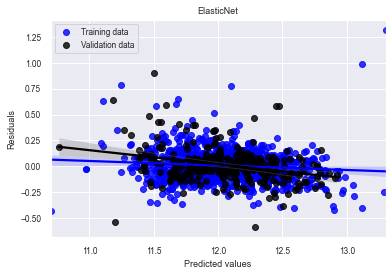

In [144]:
#plot between predicted values and residuals
sns.regplot(mlp_train_pre, mlp_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(mlp_test_pre,mlp_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Lasso

In [145]:
from sklearn.linear_model import Lasso
lasso=Lasso(
    selection='random',
    normalize=False,
    fit_intercept=True,
    alpha=0.50,
    max_iter=250,
    tol=0.10
)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=250, selection='random', tol=0.1)

In [146]:
ypredictls=lasso.predict(X_test)

In [147]:
from sklearn.metrics import r2_score
ls_acc=round(r2_score(y_test, ypredictls),2)

In [148]:
ls_acc

0.6

In [149]:
mean_squared_error(y_test,ypredictls)

0.0796024765056318

In [150]:
lasso.score(X_train,y_train)

0.6181650654341706

In [151]:
lasso.score(X_test,y_test)

0.6009932216831602

In [152]:
#getting root mean square error
ls_rmse=get_rmse(y_test,ypredictls)
ls_rmse

0.2821391084299229

In [153]:
ls_mse=mean_squared_error(y_test,ypredictls)
ls_mse

0.0796024765056318

In [154]:
ls_mae=mean_absolute_error(y_test,ypredictls) 
ls_mae

0.2070759035310139

In [155]:
ls_test_pre = lasso.predict(X_test)
ls_train_pre = lasso.predict(X_train)

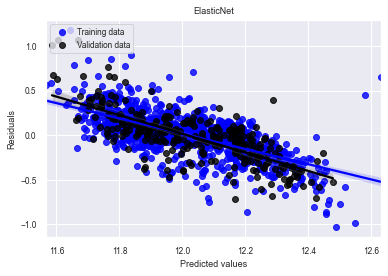

In [156]:
#plot between predicted values and residuals
sns.regplot(ls_train_pre, ls_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(ls_test_pre,ls_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("ElasticNet")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Ridge

In [157]:
from sklearn.linear_model import Ridge
ridge=Ridge(
    solver='svd',
    alpha=0.50,
    max_iter=250,
    tol=0.10
)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, max_iter=250, solver='svd', tol=0.1)

In [158]:
ypredictrd=ridge.predict(X_test)

In [159]:
from sklearn.metrics import r2_score
rd_acc=round(r2_score(y_test, ypredictrd),2)

In [160]:
rd_acc

0.88

In [161]:
mean_squared_error(y_test,ypredictrd)

0.023365072475712265

In [162]:
ridge.score(X_train,y_train)

0.8890812917633873

In [163]:
ridge.score(X_test,y_test)

0.8828827606511233

In [164]:
#getting root mean square error
rd_rmse=get_rmse(y_test,ypredictrd)
rd_rmse

0.1528563785902056

In [165]:
rd_mse=mean_squared_error(y_test,ypredictrd)
rd_mse

0.023365072475712265

In [166]:
rd_mae=mean_absolute_error(y_test,ypredictrd) 
rd_mae

0.10655084270555674

In [167]:
rd_test_pre = ridge.predict(X_test)
rd_train_pre = ridge.predict(X_train)

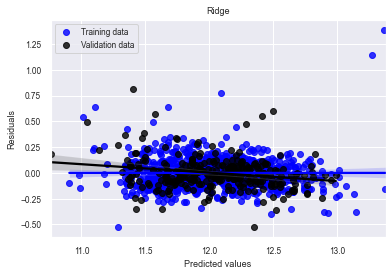

In [168]:
#plot between predicted values and residuals
sns.regplot(rd_train_pre, rd_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(rd_test_pre,rd_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# ExtraTreesRegressor

In [169]:
from sklearn.ensemble import ExtraTreesRegressor

In [170]:
etc = ExtraTreesRegressor(
    n_estimators=10)
etc.fit(X_train, y_train)
print(etc.feature_importances_)

[0.73918129 0.01550567 0.01887144 0.01193109 0.00740895 0.01008441
 0.00414633 0.00587073 0.00272566 0.00513301 0.00378037 0.00362392
 0.00339837 0.00274459 0.00263647 0.00220898 0.00330132 0.00357686
 0.00253864 0.00456133 0.00200388 0.00176405 0.00251312 0.00434752
 0.00199448 0.00243013 0.00333613 0.00257215 0.00352645 0.00485891
 0.00333271 0.00762919 0.00488131 0.00228908 0.00203088 0.00297437
 0.00514764 0.00276278 0.00303879 0.00387163 0.00330662 0.00263419
 0.00143807 0.00291221 0.00241878 0.00269622 0.00276734 0.0025009
 0.00298486 0.00397578 0.00246264 0.0027712  0.00467553 0.00266087
 0.00280217 0.0032178  0.00350975 0.00353019 0.00281308 0.00271384
 0.02067334]


In [171]:
ypredictetc=etc.predict(X_test)

In [172]:
from sklearn.metrics import r2_score
etc_acc=round(r2_score(y_test, ypredictetc),2)

In [173]:
etc_acc

0.86

In [174]:
mean_squared_error(y_test,ypredictetc)

0.02882025997199963

In [175]:
etc.score(X_train,y_train)

1.0

In [176]:
etc.score(X_test,y_test)

0.8555386768542588

In [177]:
#getting root mean square error
etc_rmse=get_rmse(y_test,ypredictetc)
etc_rmse

0.16976530850559438

In [178]:
etc_mse=mean_squared_error(y_test,ypredictetc)
etc_mse

0.02882025997199963

In [179]:
etc_mae=mean_absolute_error(y_test,ypredictetc) 
etc_mae

0.11742707565785822

In [180]:
etc_test_pre = etc.predict(X_test)
etc_train_pre = etc.predict(X_train)

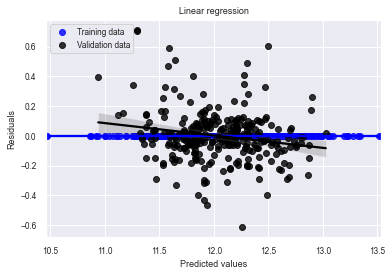

In [181]:
#plot between predicted values and residuals
sns.regplot(etc_train_pre, etc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(etc_test_pre,etc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# XGBRegressor

In [182]:
from xgboost import XGBRegressor

In [183]:
xgb = XGBRegressor(
    booster='gblinear',
    #gamma=0.05,
    #max_depth=4,
    learning_rate=0.10,
    feature_selector='cyclic',
    updater='coord_descent',
    eval_metric='rmse'
)
xgb.fit(X_train,y_train)
ypredictxgb= xgb.predict(X_test)

In [184]:
from sklearn.metrics import r2_score
xgb_acc=round(r2_score(y_test, ypredictxgb),2)

In [185]:
xgb_acc

0.88

In [186]:
mean_squared_error(y_test,ypredictxgb)

0.023366361362133343

In [187]:
xgb.score(X_train,y_train)

0.8890806599051786

In [188]:
xgb.score(X_test,y_test)

0.8828763001182219

In [189]:
#getting root mean square error
xgb_rmse=get_rmse(y_test,ypredictxgb)
xgb_rmse

0.15286059453676523

In [190]:
xgb_mse=mean_squared_error(y_test,ypredictxgb)
xgb_mse

0.023366361362133343

In [191]:
xgb_mae=mean_absolute_error(y_test,ypredictxgb) 
xgb_mae

0.10657673814069761

In [192]:
xgb_test_pre = xgb.predict(X_test)
xgb_train_pre = xgb.predict(X_train)

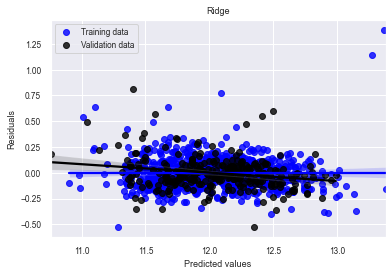

In [193]:
#plot between predicted values and residuals
sns.regplot(xgb_train_pre, xgb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(xgb_test_pre,xgb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# SGDRegressor

In [194]:
from sklearn.linear_model import SGDRegressor

In [195]:
sgdc=SGDRegressor(
    loss='squared_loss',
    alpha=0.25,
    #fit_intercept=False,
    max_iter=200,
    learning_rate='adaptive',
    #power_t=0.50,
    #validation_fraction=0.50,
    #class_weight='balanced',
    eta0=0.50
    
)

In [196]:
sgdc.fit(X_train,y_train)

SGDRegressor(alpha=0.25, eta0=0.5, learning_rate='adaptive', max_iter=200)

In [197]:
ypredictsgdc=sgdc.predict(X_test)

In [198]:
from sklearn.metrics import r2_score
sgdc_acc=round(r2_score(y_test, ypredictsgdc),2)

In [199]:
sgdc_acc

0.88

In [200]:
sgdc.score(X_train,y_train)

0.8809920221185357

In [201]:
sgdc.score(X_test,y_test)

0.8755208619572266

In [202]:
#getting root mean square error
sgdc_rmse=get_rmse(y_test,ypredictsgdc)
sgdc_rmse

0.1575873814192122

In [203]:
sgdc_mse=mean_squared_error(y_test,ypredictsgdc)
sgdc_mse

0.024833782782564262

In [204]:
sgdc_mae=mean_absolute_error(y_test,ypredictsgdc) 
sgdc_mae

0.11026452430521355

In [205]:
sgdc_test_pre = sgdc.predict(X_test)
sgdc_train_pre = sgdc.predict(X_train)

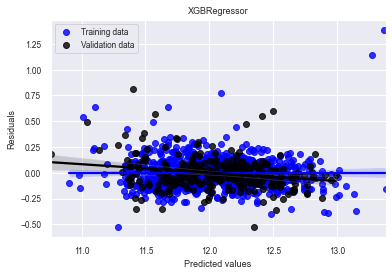

In [206]:
#plot between predicted values and residuals
sns.regplot(xgb_train_pre, xgb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(xgb_test_pre,xgb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# LiteGBM

In [207]:
from lightgbm import LGBMRegressor

In [208]:
lgbm=LGBMRegressor(
    boosting_type='gbdt',
    max_depth=16,
    learning_rate=0.25,
    num_leaves=64
)

In [209]:
lgbm.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.25, max_depth=16, num_leaves=64)

In [210]:
ypredictlgbm=lgbm.predict(X_test)

In [211]:
from sklearn.metrics import r2_score
lgbm_acc=round(r2_score(y_test, ypredictlgbm),2)

In [212]:
lgbm_acc

0.87

In [213]:
mean_squared_error(y_test,ypredictlgbm)

0.02604737690255298

In [214]:
lgbm.score(X_train,y_train)

0.9995679863322562

In [215]:
lgbm.score(X_test,y_test)

0.8694377311143475

In [216]:
#getting root mean square error
lgbm_rmse=get_rmse(y_test,ypredictlgbm)
lgbm_rmse

0.16139199764100134

In [217]:
lgbm_mse=mean_squared_error(y_test,ypredictlgbm)
lgbm_mse

0.02604737690255298

In [218]:
lgbm_mae=mean_absolute_error(y_test,ypredictlgbm) 
lgbm_mae

0.11275875011940138

In [219]:
lgbm_test_pre = lgbm.predict(X_test)
lgbm_train_pre = lgbm.predict(X_train)

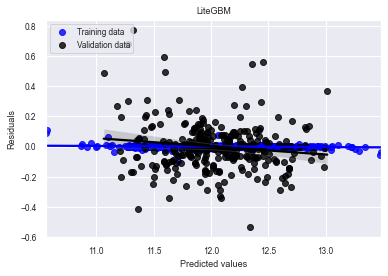

In [220]:
#plot between predicted values and residuals
sns.regplot(lgbm_train_pre, lgbm_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(lgbm_test_pre,lgbm_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("LiteGBM")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# GradientBoostingRegressor

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

In [222]:
gbc = GradientBoostingRegressor(
    #loss='deviance',
    criterion='mse',
    learning_rate=0.25,
    n_estimators=200,
    subsample=0.50,
    max_features='sqrt',
    max_depth=16,
    verbose=0
)

In [223]:
gbc.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.25, max_depth=16,
                          max_features='sqrt', n_estimators=200, subsample=0.5)

In [224]:
ypredictgbc=gbc.predict(X_test)

In [225]:
from sklearn.metrics import r2_score
gbc_acc=round(r2_score(y_test, ypredictgbc),2)

In [226]:
gbc_acc

0.76

In [227]:
mean_squared_error(y_test,ypredictgbc)

0.04844307007722159

In [228]:
#getting root mean square error
gbc_rmse=get_rmse(y_test,ypredictgbc)
gbc_rmse

0.22009786477206358

In [229]:
gbc_mse=mean_squared_error(y_test,ypredictgbc)
gbc_mse

0.04844307007722159

In [230]:
gbc_mae=mean_absolute_error(y_test,ypredictgbc) 
gbc_mae

0.15852662243882035

In [231]:
gbc_test_pre = gbc.predict(X_test)
gbc_train_pre = gbc.predict(X_train)

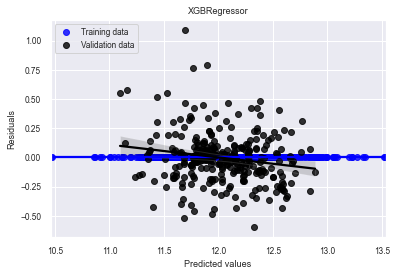

In [232]:
#plot between predicted values and residuals
sns.regplot(gbc_train_pre, gbc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(gbc_test_pre,gbc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("XGBRegressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# CatBoostRegressor

In [233]:
from catboost import CatBoostRegressor

In [234]:
cb=CatBoostRegressor(
    loss_function="RMSE",
    task_type="CPU",
    learning_rate=0.10,
    iterations=500,
    l2_leaf_reg=5,
    depth=7,
    silent=True
                                                   
)
cb.fit(X_train,y_train)

In [235]:
ypredictcb=cb.predict(X_test)

In [236]:
from sklearn.metrics import r2_score
cb_acc=round(r2_score(y_test, ypredictcb),2)

In [237]:
cb_acc

0.85

In [238]:
mean_squared_error(y_test,ypredictcb)

0.029341044698714205

In [239]:
cb.score(X_train,y_train)

0.9993927792702445

In [240]:
cb.score(X_test,y_test)

0.8529282475670708

In [241]:
#getting root mean square error
cb_rmse=get_rmse(y_test,ypredictcb)
cb_rmse

0.1712922785729532

In [242]:
cb_mse=mean_squared_error(y_test,ypredictcb)
cb_mse

0.029341044698714205

In [243]:
cb_mae=mean_absolute_error(y_test,ypredictcb) 
cb_mae

0.11082199688404105

In [244]:
cb_test_pre = cb.predict(X_test)
cb_train_pre = cb.predict(X_train)

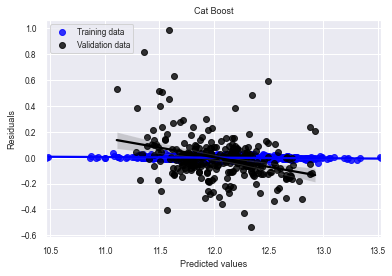

In [245]:
#plot between predicted values and residuals
sns.regplot(cb_train_pre, cb_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(cb_test_pre,cb_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("Cat Boost")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# KNN

In [246]:
from sklearn.neighbors import KNeighborsRegressor

In [247]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [248]:
ypredictknn = knn.predict(X_test)

In [249]:
from sklearn.metrics import r2_score
knn_acc=round(r2_score(y_test, ypredictknn),2)

In [250]:
knn_acc

0.79

In [251]:
mean_squared_error(y_test,ypredictknn)

0.04225693222798551

In [252]:
#getting root mean square error
knn_rmse=get_rmse(y_test,ypredictknn)
knn_rmse

0.20556491001137697

In [253]:
knn_mse=mean_squared_error(y_test,ypredictknn)
knn_mse

0.04225693222798551

In [254]:
knn_mae=mean_absolute_error(y_test,ypredictknn) 
knn_mae

0.14566022519021246

In [255]:
knn_test_pre = knn.predict(X_test)
knn_train_pre = knn.predict(X_train)

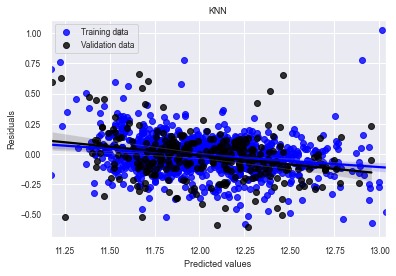

In [256]:
#plot between predicted values and residuals
sns.regplot(knn_train_pre, knn_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(knn_test_pre,knn_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Random Forest Regressor

In [257]:
from sklearn.ensemble import RandomForestRegressor

In [258]:
rfc=RandomForestRegressor(
    n_estimators=120,
    max_depth=25,
    random_state=25
)
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=120, random_state=25)

In [259]:
ypredictrfc = rfc.predict(X_test)

In [260]:
from sklearn.metrics import r2_score
rfc_acc=round(r2_score(y_test, ypredictrfc),2)

In [261]:
rfc_acc

0.86

In [262]:
from sklearn.metrics import mean_squared_log_error
rfc_rmse=get_rmse(y_test,ypredictrfc)
rfc_rmse

0.1665992774605677

In [263]:
rfc_mse=mean_squared_error(y_test,ypredictrfc)
rfc_mse

0.027755319250383225

In [264]:
rfc_mae=mean_absolute_error(y_test,ypredictrfc) 
rfc_mae

0.11354884763081247

In [265]:
rfc_test_pre = rfc.predict(X_test)
rfc_train_pre = rfc.predict(X_train)

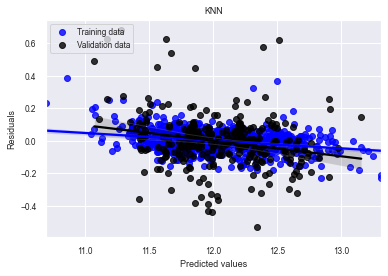

In [266]:
#plot between predicted values and residuals
sns.regplot(rfc_train_pre, rfc_train_pre - y_train, color = "blue",  label = "Training data")
sns.regplot(rfc_test_pre,rfc_test_pre - y_test, color = "black",  label = "Validation data")
plt.title("KNN")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.plot([10.5,13.5], [0, 0], c = "red")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Model Performance

In [267]:
index=['Accuracy','RMSE','MSE','MAE']
test_perf_data = pd.DataFrame({'LR':[lr_acc,lr_rmse,lr_mse,lr_mae], 
                     'ElasticNet':[en_acc,en_rmse,en_mse,en_mae],
                     'LR scaled':[lr_scaled_acc,lr_scaled_rmse,lr_scaled_mse,lr_scaled_mae],
                     'SVR':[svr_acc,svr_rmse,svr_mse,svr_mae],
                     'MLPR':[xgb_acc,xgb_rmse,xgb_mse,xgb_mae],
                     'Lasso':[ls_acc,ls_rmse,ls_mse,ls_mae],
                     'Ridge':[rd_acc,rd_rmse,rd_mse,rd_mae],
                     'ExtraTress':[etc_acc,etc_rmse,etc_mse,etc_mae],
                     'XGBRegressor':[xgb_acc,xgb_rmse,xgb_mse,xgb_mae],
                     'SGDRegressor':[sgdc_acc,sgdc_rmse,sgdc_mse,sgdc_mae],
                     'LiteGBM':[lgbm_acc,lgbm_rmse,lgbm_mse,lgbm_mae],
                     'GBRegressor':[gbc_acc,gbc_rmse,gbc_mse,gbc_mae],
                     'CatBoost':[cb_acc,cb_rmse,cb_mse,cb_mae],
                     'RF':[rfc_acc,rfc_rmse,rfc_mse,rfc_mae],        
                     },index=index)
round(test_perf_data,4)

,LR,ElasticNet,LR scaled,SVR,MLPR,Lasso,Ridge,ExtraTress,XGBRegressor,SGDRegressor,LiteGBM,GBRegressor,CatBoost,RF
Accuracy,0.8800,0.8800,0.8800,0.8300,0.8800,0.6000,0.8800,0.8600,0.8800,0.8800,0.8700,0.7600,0.8500,0.8600
RMSE,0.1529,0.1528,0.1529,0.1833,0.1529,0.2821,0.1529,0.1698,0.1529,0.1576,0.1614,0.2201,0.1713,0.1666
MSE,0.0166,0.0233,0.0234,0.0336,0.0234,0.0796,0.0234,0.0288,0.0234,0.0248,0.0260,0.0484,0.0293,0.0278
MAE,0.1066,0.1065,0.1065,0.1152,0.1066,0.2071,0.1066,0.1174,0.1066,0.1103,0.1128,0.1585,0.1108,0.1135


# Comparison plot: all models

In [268]:
model_acc = [lr_acc, en_acc, lr_scaled_acc, svr_acc,mlp_acc,ls_acc,rd_acc,etc_acc,xgb_acc,sgdc_acc,lgbm_acc,gbc_acc,cb_acc,rfc_acc]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [269]:
model_comp = pd.DataFrame({"Model": list_model,
                          "Model_Score": model_acc}) 

In [270]:
model_comp=model_comp.sort_values('Model_Score',ascending=True)

In [271]:
model_comp

,Model,Model_Score
5,Lasso,0.60
11,GBRegressor,0.76
3,SVR,0.83
4,MLPR,0.85
12,CatBoost,0.85
7,ExtraTress,0.86
13,RF,0.86
10,LiteGBM,0.87
0,Linear,0.88
1,ElasticNet,0.88


# Model Accuracy Comparison

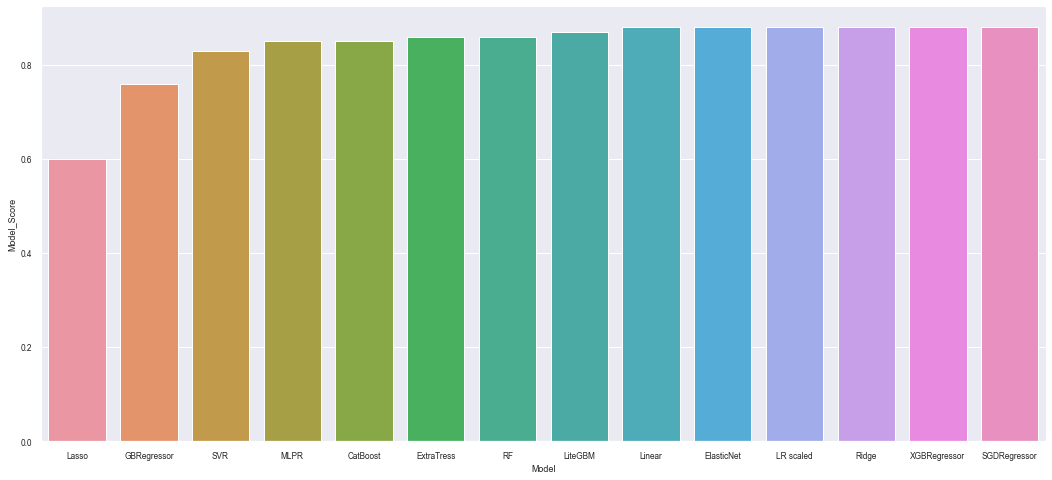

In [272]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="Model_Score", data=model_comp)
plt.show()

# RMSE Comparison

In [273]:
rmse = [lr_rmse, en_rmse, lr_scaled_rmse, svr_rmse,mlp_rmse,ls_rmse,rd_rmse,etc_rmse,xgb_rmse,sgdc_rmse,lgbm_rmse,gbc_rmse,cb_rmse,rfc_rmse]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [274]:
rmse_comp=pd.DataFrame({'Model':list_model,
                       'RMSE':rmse})

In [275]:
rmse_comp=rmse_comp.sort_values('RMSE',ascending=True)

In [276]:
rmse_comp

,Model,RMSE
1,ElasticNet,0.152783
6,Ridge,0.152856
2,LR scaled,0.152857
0,Linear,0.152857
8,XGBRegressor,0.152861
9,SGDRegressor,0.157587
10,LiteGBM,0.161392
13,RF,0.166599
7,ExtraTress,0.169765
4,MLPR,0.170257


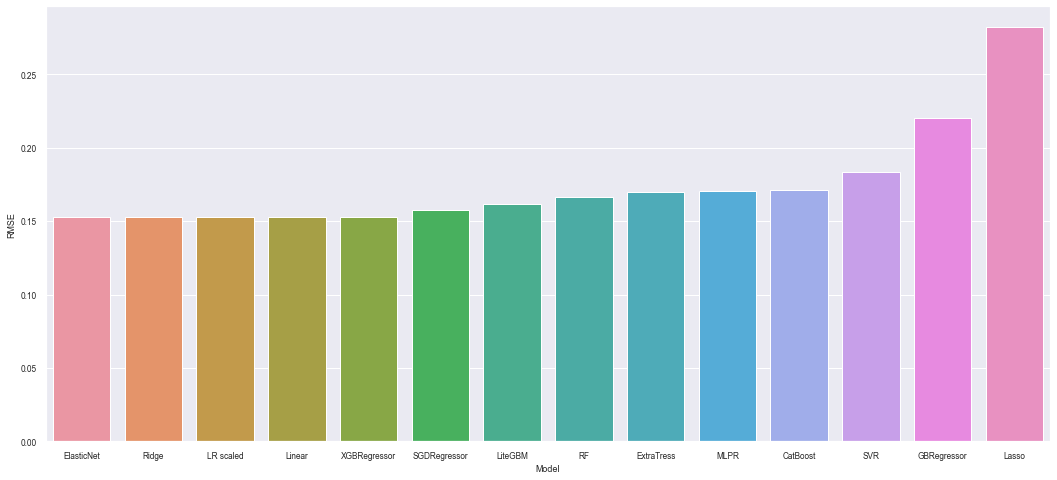

In [277]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="RMSE", data=rmse_comp)
plt.show()

# MSE Comaprison

In [278]:
model_mse = [lr_mse, en_mse, lr_scaled_mse, svr_mse,mlp_mse,ls_mse,rd_mse,etc_mse,xgb_mse,sgdc_mse,lgbm_mse,gbc_mse,cb_mse,rfc_mse]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [279]:
mse_comp=pd.DataFrame({'Model':list_model,
                      'MSE':model_mse})

In [280]:
mse_comp=mse_comp.sort_values('MSE', ascending=True)
mse_comp

,Model,MSE
0,Linear,0.016563
1,ElasticNet,0.023343
6,Ridge,0.023365
2,LR scaled,0.023365
8,XGBRegressor,0.023366
9,SGDRegressor,0.024834
10,LiteGBM,0.026047
13,RF,0.027755
7,ExtraTress,0.028820
4,MLPR,0.028988


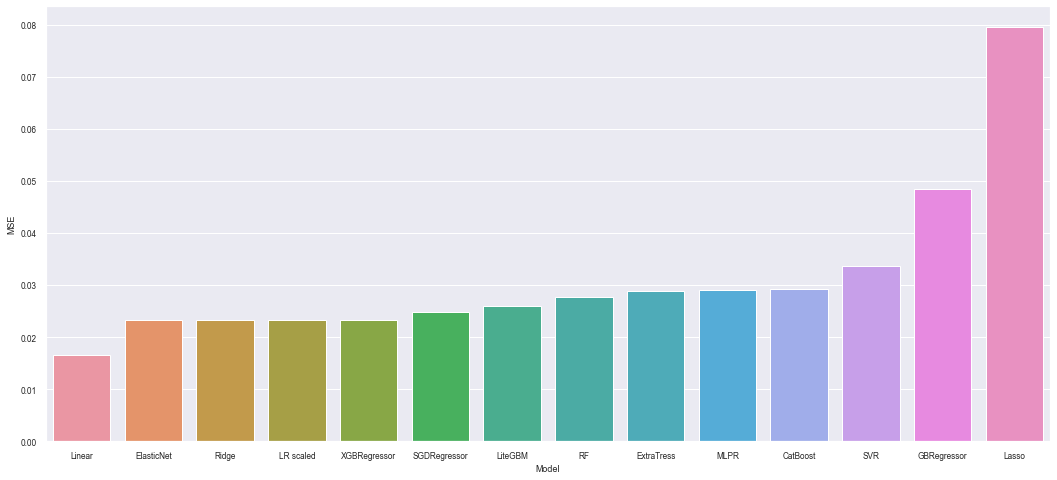

In [281]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="MSE", data=mse_comp)
plt.show()

# MAE Comparison

In [282]:
model_mae = [lr_mae, en_mae, lr_scaled_mae, svr_mae,mlp_mae,ls_mae,rd_mae,etc_mae,xgb_mae,sgdc_mae,lgbm_mae,gbc_mae,cb_mae,rfc_mae]
list_model = ['Linear','ElasticNet','LR scaled','SVR','MLPR','Lasso','Ridge','ExtraTress','XGBRegressor','SGDRegressor','LiteGBM','GBRegressor','CatBoost','RF']

In [283]:
mae_comp=pd.DataFrame({'Model':list_model,
                      'MAE':model_mae})

In [284]:
mae_comp=mae_comp.sort_values('MAE',ascending=True)

In [285]:
mae_comp

,Model,MAE
1,ElasticNet,0.106504
2,LR scaled,0.106504
6,Ridge,0.106551
0,Linear,0.106554
8,XGBRegressor,0.106577
9,SGDRegressor,0.110265
12,CatBoost,0.110822
10,LiteGBM,0.112759
13,RF,0.113549
3,SVR,0.115167


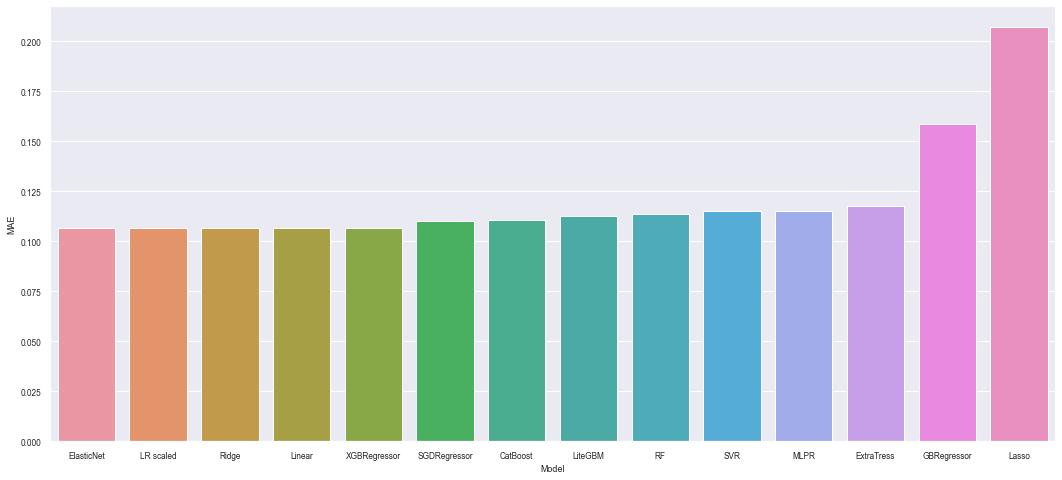

In [286]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model', y="MAE", data=mae_comp)
plt.show()

# Conclusion:

From the above 
1. Model comparison we can see the best performing model above 88% are Linear, Elastic Net, Linear Scaled , Ridge , XGBoost
2. Root Mean Square Error Comparison we can see the least error occured in Elastic Net, Ridge,Linear, XGBoost
3. Mean Square Error Comparison we can see the least error occured in Linear, Elastic Net, Ridge, XGBoost
4. Mean Absolute Error Comparison we can see the least error occured in CatBoost, ElasticNet, LR Scaled, Linear
From this we can select the best model are Elastic Net and Linear Regression both has 88% R-square and the least Root mean square is Elastic Net and the least Mean square is Linear Regression. So both model can perform well in the production level datas.